Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

### Number of Day to Predict 21

In [1]:
num_days_R_prediction=21

In [2]:
#!pip install rpy2
import rpy2
%load_ext rpy2.ipython
%Rpush num_days_R_prediction

In [3]:
%%R
max_days_prediction<-num_days_R_prediction

### Load Data from Github - John Hopkins Institute 

In [4]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [5]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                         Recovered                  Canada   0.000000   
239                               NaN                    Laos  19.856270   
240                               NaN                   Libya  26.335100   
241                               NaN      West Bank and Gaza  31.952200   
242                               NaN           Guinea-Bissau  11.803700   
243                               NaN                    Mali  17.570692   
244                               NaN   Saint Kitts and Nevis  17.357822   
245             Northwest Territories                  Canada  64.825500   
246                             Yukon                  Canada  64.282300   
247                               NaN                  Kosovo  42.602636   
248                               NaN                   Burma  21.916200   
249                          Anguilla          United Kingdom  18.220600   
250            British Virgin Islands          United Kingdom  18.420700   
251          Turks and Caicos Islands          United Kingdom  21.694000   
252                               NaN              MS Zaandam   0.000000   
253                               NaN                Botswana -22.328500   
254                               NaN                 Burundi  -3.373100   
255                               NaN            Sierra Leone   8.460555   
256  Bonaire, Sint Eustatius and Saba             Netherlands  12.17840

## Get Population

In [6]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [7]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
238                               NaN             Timor-Leste  -8.874217   
239                               NaN                  Belize  13.193900   
240                         Recovered                  Canada   0.000000   
241                               NaN                    Laos  19.856270   
242                               NaN                   Libya  26.335100   
243                               NaN      West Bank and Gaza  31.952200   
244                               NaN           Guinea-Bissau  11.803700   
245                               NaN                    Mali  17.570692   
246                               NaN   Saint Kitts and Nevis  17.357822   
247             Northwest Territories                  Canada  64.825500   
248                             Yukon                  Canada  64.282300   
249                               NaN                  Kosovo  42.602636   
250                               NaN                   Burma  21.916200   
251                          Anguilla          United Kingdom  18.220600   
252            British Virgin Islands          United Kingdom  18.420700   
253          Turks and Caicos Islands          United Kingdom  21.694000   
254                               NaN              MS Zaandam   0.000000   
255                               NaN                Botswana -22.328500   
256                               NaN                 Burundi  -3.373100   
257                               NaN            Sierra Leone   8.460555   
258  Bonaire, Sint Eustatius and Saba             Netherlands  12.17840

In [8]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/23/20  \
185        0        0        0        0        0        0  ...      454   
186        0        0        0        0        0        0  ...      820   
187        0        0        0        0        0        0  ...       10   
188        0        0        0        0        0        0  ...      545   
189        0        0        0        0        0        0  ...      555   
190        0        0        0        0        0        0  ...        0   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       40   
194        0        0        0        0        0        0  ...      121   

     4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  \
185      494      524      535      562      596      624      644   
186      854      880      903      928      948      973      989   
187       10       10       10       10       10       10       10   
188      567      601      619      641      663      693      717   
189      615      681      747      794      867      972     1073   
190        0        0        0        0        0        0        0   
191        0        0        0        0        0        0        0   
192        0        0        0        0        0        0        0   
193       40       40       41       41       41       41       41   
194      127      136      139      144      152      157      162   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 106 columns]

In [9]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/23/20  4/24/20  4/25/20  \
175        0        0        0        0  ...      307      325      329   
176        0        0        0        0  ...     2527     2755     2866   
177        0        0        0        0  ...      271      319      338   
178        0        0        0        0  ...        0        0        0   
179        0        0        0        0  ...       67       78       85   
180        0        0        0        0  ...     7422     7496     7797   
181        0        0        0        0  ...      722      762      792   
182        0        0        0        0  ...     1740     1944     2126   
183        0        0        0        0  ...     1201     1228     1277   
184        0        0        0        0  ...      750      809      929   

     4/26/20  4/27/20  4/28/20  4/29/20  4/30/20   Population   \
175      333      364      364      364      495     4,636,000   
176     2936     3029     3233     3425     4315   197,000,000   
177      338      455      455      527      576     4,299,739   
178        0        0        0        0        0           NaN   
179       85       93      102      102      113     7,111,652   
180     8088     8425     9179    10037    10405    32,870,710   
181      862      932      975     1023     1043   104,900,000   
182     2265     2466     2655     3025     3236    37,980,000   
183     1329     1357     1389     1470     1519    10,290,000   
184     1012     1066     1134     1243     1372     2,870,256   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 106 columns]

In [10]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/23/20  \
185        0        0        0        0        0        0  ...    10511   
186        0        0        0        0        0        0  ...    22353   
187        0        0        0        0        0        0  ...     7764   
188        0        0        0        0        0        0  ...    10096   
189        0        0        0        0        0        0  ...    62773   
190        0        0        0        0        0        0  ...      154   
191        0        0        0        0        0        0  ...       15   
192        0        0        0        0        0        0  ...       13   
193        0        0        0        0        0        0  ...      501   
194        0        0        0        0        0        0  ...    13930   

     4/24/20  4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  \
185    10892    11273    11617    11902    12218    12640    12877   
186    22797    23392    23864    24027    24322    24505    25045   
187     8525     9358    10287    11244    11921    12564    13409   
188    10417    10635    11036    11339    11616    11978    12240   
189    68622    74588    80949    87147    93558    99399   106498   
190      176      183      191      207      212      225      243   
191       15       15       15       15       15       17       17   
192       14       14       14       15       15       16       16   
193      513      513      538      538      553      563      569   
194    15102    16299    17522    18811    20077    21402    22753   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187     2,870,256                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193        33,916                        San Marino_nan  
194    34,695,447                      Saudi Arabia_nan  

[10 rows x 106 columns]

In [11]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/23/20  4/24/20  4/25/20  \
220        0        0        0        0  ...       66       70       70   
221        0        0        0        0  ...      521      523      525   
222        0        0        0        0  ...      133      133      136   
223        0        0        0        0  ...      307      308      308   
224        0        0        0        0  ...       11       11       11   
225        0        0        0        0  ...   138078   143464   148377   
226        0        0        0        0  ...      557      563      596   
227        2        2        5        5  ...   869170   905358   938154   
228        0        0        0        0  ...     1758     1804     1862   
229        0        0        0        0  ...      311      318      323   

     4/26/20  4/27/20  4/28/20  4/29/20  4/30/20   Population   \
220       70       70       70       73       73           NaN   
221      525      525      530      537      537       173,519   
222      141      141      141      141      144        33,693   
223      308      308      309      313      315        84,939   
224       11       11       11       11       11         4,991   
225   152840   157149   161145   165221   171253    66,440,000   
226      606      620      625      630      643     3,471,150   
227   965785   988197  1012582  1039909  1069424   327,200,000   
228     1869     1904     1939     2002     2039    33,363,556   
229      325      329      329      331      333           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 106 columns]

## Create Time Series + Plots

In [12]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [13]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

In [14]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
plt.show()

No handles with labels found to put in legend.


<Figure size 640x480 with 1 Axes>

Text(0.5, 1.0, 'Daily Update - Total Recovered - Major_4,25 2nd Areas')

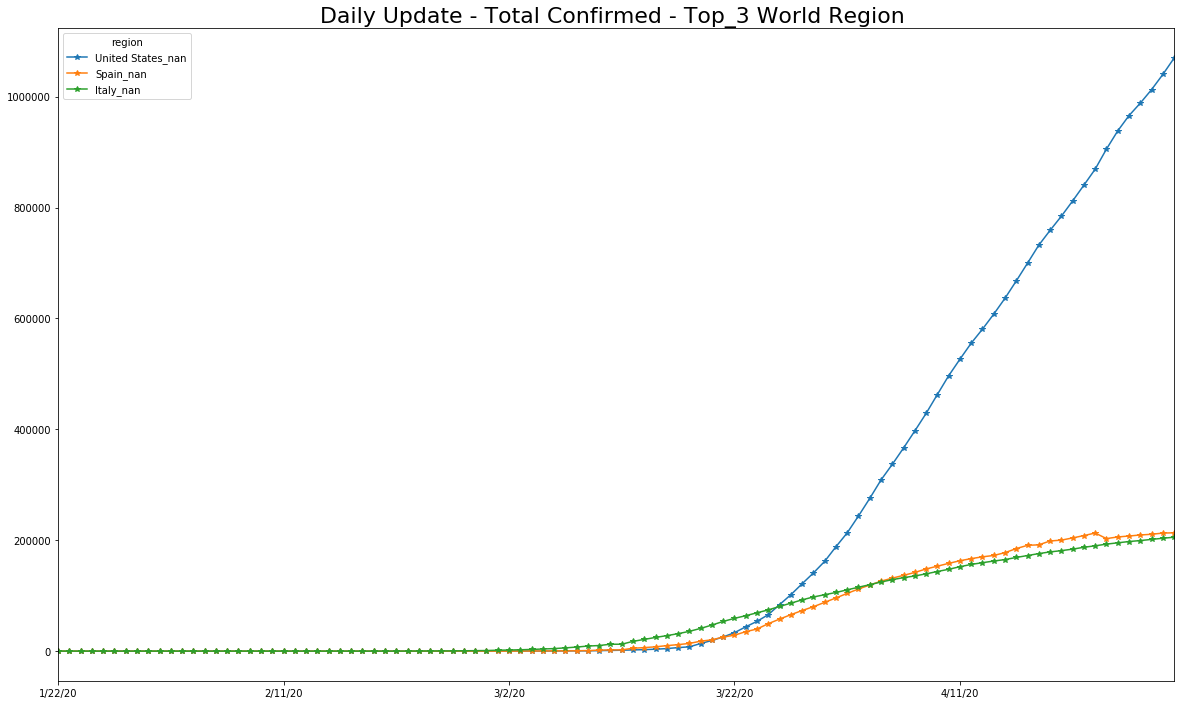

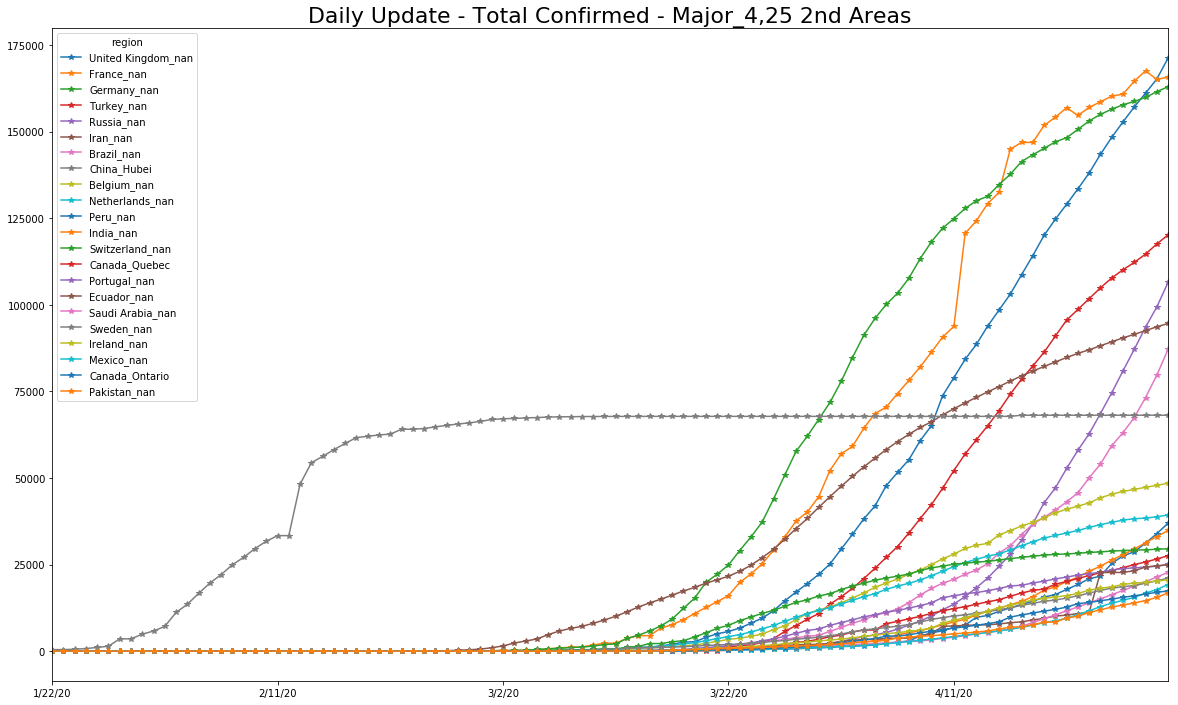

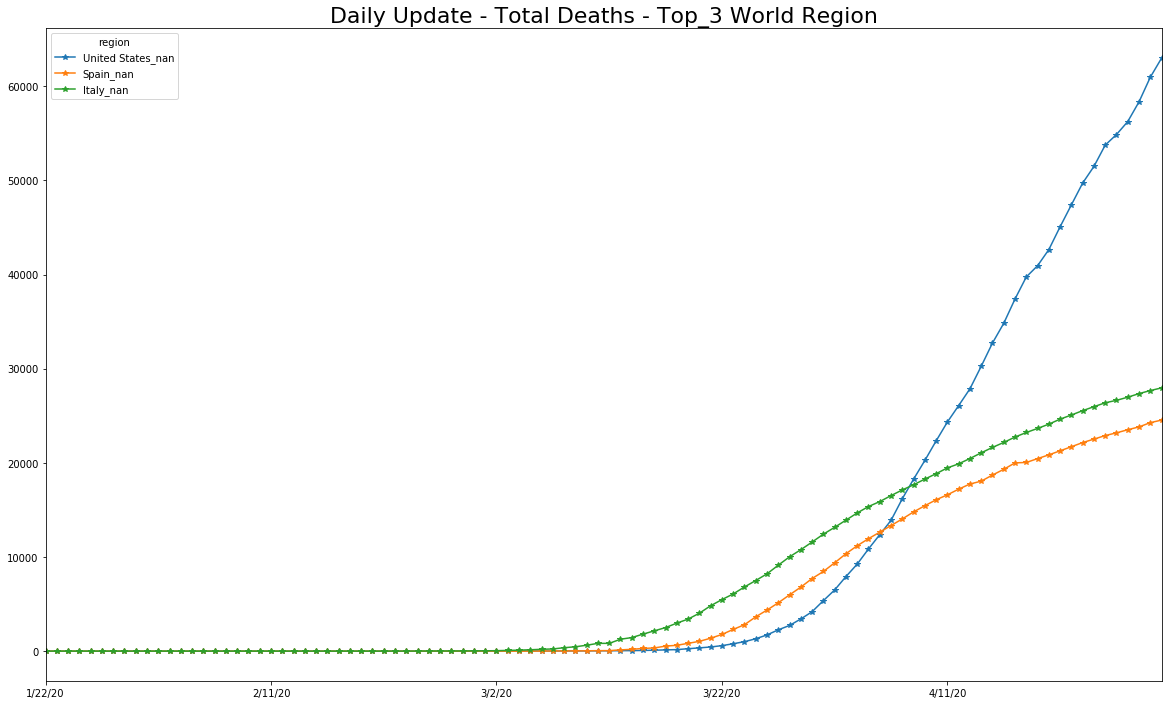

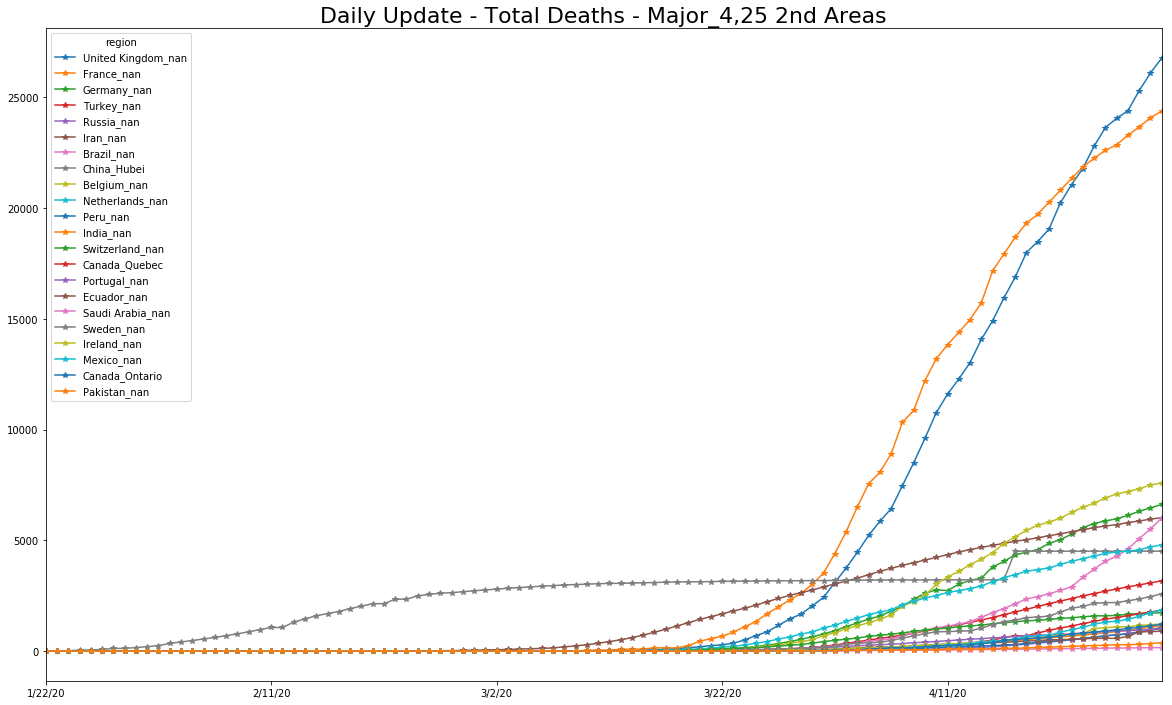

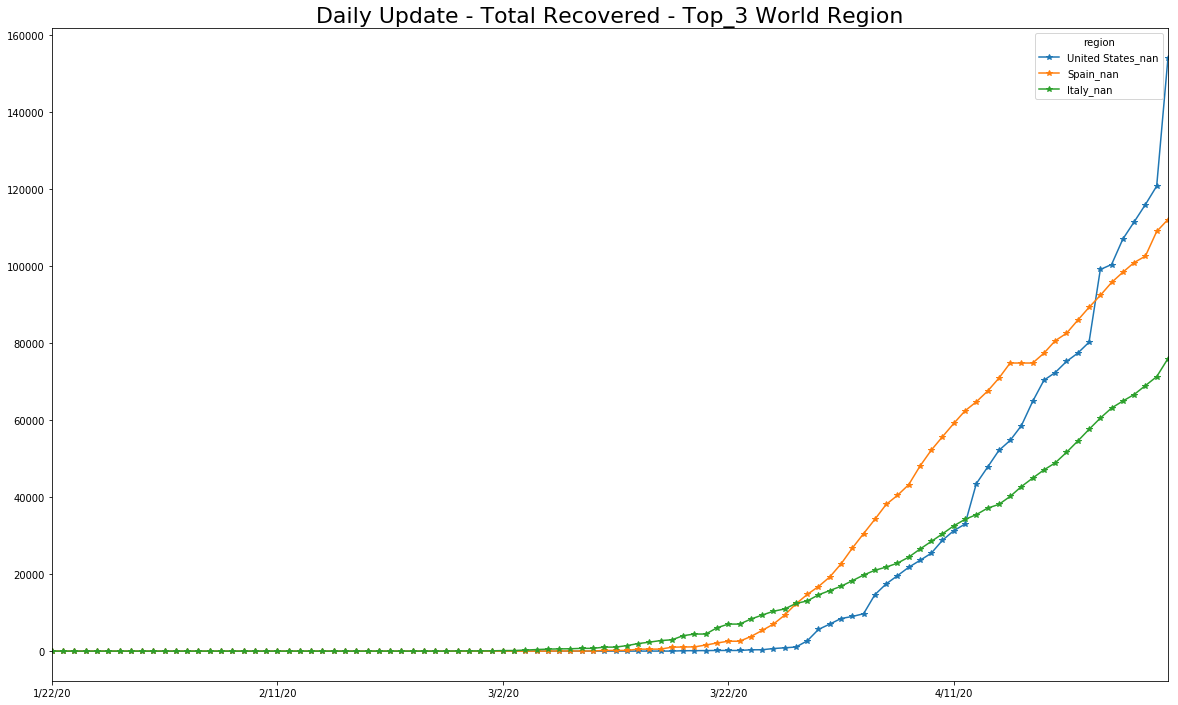

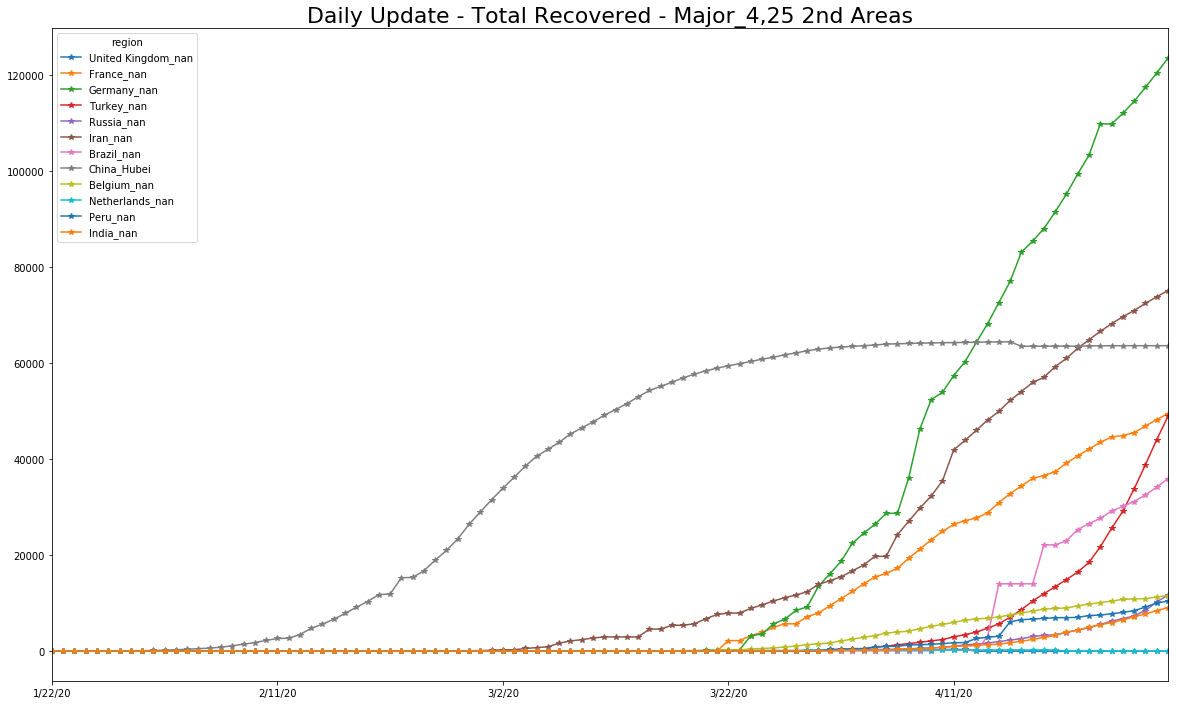

In [15]:
#
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Deaths - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Update - Total Recovered - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [16]:
#!pip install pyweatherbit
#
from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#
#api_key="46f953cbca334ea1b85ab5d47dbc9aa0" # joao@fuelbigdata.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090" # jpacerqueira.consult.bigdata@gmail.com
#

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [17]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Portugal_nan',
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
        'Poland_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 
        'Brazil_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
        'Canada_Quebec',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
        'Taiwan*_nan',
        'Turkey_nan', 
        'Vietnam_nan',
       ]
#

#### Weather History

In [18]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=len(confirmed.iloc[1])-1 #90# 89 #88 #87 #86 #85 #84 #83 #82 #81 #80 #79 #78 #77 #76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

my_weather_fetch_list= my_train_list # ['Canada_Quebec'] #  ['Iran_nan'] #['Brazil_nan'] #

start_date_init=pd.to_datetime('today').strftime('%Y/%m/%d') # '2020-04-18'
print('start_date_init=',start_date_init)
offset_days=-1 # -1 to start yesterday pick today # API free-tier just picks one per api call!
max_days=1 #1

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_weather_fetch_list:
            continue
        if confirmed.iloc[i,vpos] in my_weather_fetch_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan
start_date_init= 2020/05/01


In [19]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [20]:
w[:]

date                     region   min   max
0   2020/05/02  Australia_New South Wales  10.8  17.1
1   2020/05/02                Belgium_nan   7.2   8.9
2   2020/05/02                 Brazil_nan  15.6  17.8
3   2020/05/02             Canada_Ontario  -1.6   1.7
4   2020/05/02              Canada_Quebec   0.0   1.0
5   2020/05/02              China_Beijing  16.0  32.0
6   2020/05/02            China_Guangdong  23.0  30.0
7   2020/05/02            China_Hong Kong  20.6  25.8
8   2020/05/02                China_Hubei  21.0  29.0
9   2020/05/02                China_Macau  23.0  27.0
10  2020/05/02             China_Shanghai  21.3  25.2
11  2020/05/02                Finland_nan  -3.3   4.4
12  2020/05/02                 France_nan   8.5   9.8
13  2020/05/02                Germany_nan   7.0   9.0
14  2020/05/02                  India_nan  24.0  36.0
15  2020/05/02                   Iran_nan   8.0  18.0
16  2020/05/02                  Italy_nan  10.4  14.8
17  2020/05/02                  Japan_nan   8.4  24.2
18  2020/05/02           Korea, South_nan  13.0  29.0
19  2020/05/02               Malaysia_nan  24.0  34.0
20  2020/05/02            Netherlands_nan  11.1  13.3
21  2020/05/02                 Norway_nan  -3.3  -2.8
22  2020/05/02            Philippines_nan  26.7  34.4
23  2020/05/02                 Poland_nan   8.9  12.2
24  2020/05/02               Portugal_nan  14.8  15.9
25  2020/05/02                 Russia_nan   7.9  13.0
26  2020/05/02              Singapore_nan  25.5  31.0
27  2020/05/02                  Spain_nan  11.7  14.5
28  2020/05/02                 Sweden_nan   2.2   3.9
29  2020/05/02            Switzerland_nan   5.8   8.0
30  2020/05/02                Taiwan*_nan  20.0  30.0
31  2020/05/02                 Turkey_nan   9.3  12.0
32  2020/05/02         United Kingdom_nan   5.6   6.7
33  2020/05/02          United States_nan  13.8  15.3
34  2020/05/02                Vietnam_nan  25.0  31.0

## Kalman Filter With R

In [21]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 20/02 as
### they are too in the Past and model no longuer trains in China Hubei

#ts=ts[29:]
#ts_d=ts_d[29:]
#ts_rec=ts_rec[29:]

In [22]:
ts[-4:-1]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
4/27/20             1703          736         3517          743          27   
4/28/20             1828          750         3649          743          27   
4/29/20             1939          766         3848          743          27   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
4/27/20                       24           4003         1808   
4/28/20                       24           4127         1867   
4/29/20                       24           4285         1932   

region   Australia_Australian Capital Territory  Australia_New South Wales  \
4/27/20                                     106                       3004   
4/28/20                                     106                       3016   
4/29/20                                     106                       3016   

region   ...  United States_nan  Uruguay_nan  Uzbekistan_nan  Venezuela_nan  \
4/27/20  ...             988197          620            1904            329   
4/28/20  ...            1012582          625            1939            329   
4/29/20  ...            1039909          630            2002            331   

region   Vietnam_nan  West Bank and Gaza_nan  Western Sahara_nan  Yemen_nan  \
4/27/20          270                     342                   6          1   
4/28/20          270                     343                   6          1   
4/29/20          270                     344                   6          6   

region   Zambia_nan  Zimbabwe_nan  
4/27/20          88            32  
4/28/20          95            32  
4/29/20          97            32  

[3 rows x 266 columns]

In [23]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [24]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')

Sys.setenv(TZ='GMT')
Sys.timezone()

[1] "GMT"


In [25]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

R[write to console]: Loading required package: pracma

R[write to console]: Loading required package: Metrics

R[write to console]: Loading required package: readr

R[write to console]: Parsed with column specification:
cols(
  .default = col_double(),
  date = col_date(format = "")
)

R[write to console]: See spec(...) for full column specifications.



In [26]:
p=%R pred_all

In [27]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [28]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

w_v2_v2=pd.read_csv('data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w_v2_v227=pd.read_csv('data/w_v2_v227.csv', sep=',', encoding='latin1')
w_v2_v227['date']=pd.to_datetime(w_v2_v227['date'],format='%Y/%m/%d')

w=pd.read_csv('data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

### Append Weather fetched now to file w_v2_v2
w_n_forward=w_v2_v2.append(w_v2_v227) 
w_n_forward=w_n_forward.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_n_forward=w_n_forward.sort_values(by=['region','date'], ascending=True)
w_n_forward.to_csv(r'data/w_v2_v2.csv', index = False, header=True)

In [29]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2).append(w_v2_v227) 
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [30]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [31]:
w_in_model.tail(2)

date       region   min   max
6584 2020-05-01  Vietnam_nan  25.0  33.0
6585 2020-05-02  Vietnam_nan  25.0  31.0

### Build Train Set Data Structure

In [32]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [33]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-2,2]*100 -1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-4,2]*100 -1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2]*100 +1)/(t.iloc[i-8,2]*100 -1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(10000000) ### Fill 10M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=(((train['last_day'] +1)*100)/((train['population'] +1)*100000) *10) # *100 - % converter
 #
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
train=train.merge(w_in_model,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [34]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date           region  confirmed  1_day_change  3_day_change  \
34    2020-02-25  Afghanistan_nan          1             1             1   
35    2020-02-26  Afghanistan_nan          1             0             1   
36    2020-02-27  Afghanistan_nan          1             0             1   
37    2020-02-28  Afghanistan_nan          1             0             0   
38    2020-02-29  Afghanistan_nan          1             0             0   
39    2020-03-01  Afghanistan_nan          1             0             0   
40    2020-03-02  Afghanistan_nan          1             0             0   
41    2020-03-03  Afghanistan_nan          1             0             0   
42    2020-03-04  Afghanistan_nan          1             0             0   
43    2020-03-05  Afghanistan_nan          1             0             0   
44    2020-03-06  Afghanistan_nan          1             0             0   
45    2020-03-07  Afghanistan_nan          1             0             0   
46    2020-03-08  Afghanistan_nan          4             0             0   
47    2020-03-09  Afghanistan_nan          4             3             3   
48    2020-03-10  Afghanistan_nan          5             0             3   
49    2020-03-11  Afghanistan_nan          7             1             4   
50    2020-03-12  Afghanistan_nan          7             2             3   
51    2020-03-13  Afghanistan_nan          7             0             3   
52    2020-03-14  Afghanistan_nan         11             0             2   
53    2020-03-15  Afghanistan_nan         16             4             4   
54    2020-03-16  Afghanistan_nan         21             5             9   
55    2020-03-17  Afghanistan_nan         22             5            14   
56    2020-03-18  Afghanistan_nan         22             1            11   
57    2020-03-19  Afghanistan_nan         22             0             6   
58    2020-03-20  Afghanistan_nan         24             0             1   
59    2020-03-21  Afghanistan_nan         24             2             2   
60    2020-03-22  Afghanistan_nan         40             0             2   
61    2020-03-23  Afghanistan_nan         40            16            18   
62    2020-03-24  Afghanistan_nan         74             0            16   
63    2020-03-25  Afghanistan_nan         84            34            50   
...          ...              ...        ...           ...           ...   
27038 2020-04-02     Zimbabwe_nan          9             0             1   
27039 2020-04-03     Zimbabwe_nan          9             1             2   
27040 2020-04-04     Zimbabwe_nan          9             0             1   
27041 2020-04-05     Zimbabwe_nan          9             0             1   
27042 2020-04-06     Zimbabwe_nan         10             0             0   
27043 2020-04-07     Zimbabwe_nan         11             1             1   
27044 2020-04-08     Zimbabwe_nan         11             1             2   
27045 2020-04-09     Zimbabwe_nan         11             0             2   
27046 2020-04-10     Zimbabwe_nan         13             0             1   
27047 2020-04-11     Zimbabwe_nan         14             2             2   
27048 2020-04-12     Zimbabwe_nan         14             1             3   
27049 2020-04-13     Zimbabwe_nan         17             0             3   
27050 2020-04-14     Zimbabwe_nan         17             3             4   
27051 2020-04-15     Zimbabwe_nan         23             0             3   
27052 2020-04-16     Zimbabwe_nan         23             6             9   
27053 2020-04-17     Zimbabwe_nan         24             0             6   
27054 2020-04-18     Zimbabwe_nan         25             1             7   
27055 2020-04-19     Zimbabwe_nan         25             1             2   
27056 2020-04-20     Zimbabwe_nan         25             0             2   
27057 2020-04-21     Zimbabwe_nan         28             0             1   
27058 2020-04-22     Zimbabwe_nan         28             3  

In [35]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [36]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date           region  confirmed  1_day_change  3_day_change  \
0     2020-01-22  Afghanistan_nan          0             0             0   
1     2020-01-23  Afghanistan_nan          0             0             0   
2     2020-01-24  Afghanistan_nan          0             0             0   
3     2020-01-25  Afghanistan_nan          0             0             0   
4     2020-01-26  Afghanistan_nan          0             0             0   
5     2020-01-27  Afghanistan_nan          0             0             0   
6     2020-01-28  Afghanistan_nan          0             0             0   
7     2020-01-29  Afghanistan_nan          0             0             0   
8     2020-01-30  Afghanistan_nan          0             0             0   
9     2020-01-31  Afghanistan_nan          0             0             0   
10    2020-02-01  Afghanistan_nan          0             0             0   
11    2020-02-02  Afghanistan_nan          0             0             0   
12    2020-02-03  Afghanistan_nan          0             0             0   
13    2020-02-04  Afghanistan_nan          0             0             0   
14    2020-02-05  Afghanistan_nan          0             0             0   
15    2020-02-06  Afghanistan_nan          0             0             0   
16    2020-02-07  Afghanistan_nan          0             0             0   
17    2020-02-08  Afghanistan_nan          0             0             0   
18    2020-02-09  Afghanistan_nan          0             0             0   
19    2020-02-10  Afghanistan_nan          0             0             0   
20    2020-02-11  Afghanistan_nan          0             0             0   
21    2020-02-12  Afghanistan_nan          0             0             0   
22    2020-02-13  Afghanistan_nan          0             0             0   
23    2020-02-14  Afghanistan_nan          0             0             0   
24    2020-02-15  Afghanistan_nan          0             0             0   
25    2020-02-16  Afghanistan_nan          0             0             0   
26    2020-02-17  Afghanistan_nan          0             0             0   
101   2020-01-22      Albania_nan          0             0             0   
102   2020-01-23      Albania_nan          0             0             0   
103   2020-01-24      Albania_nan          0             0             0   
...          ...              ...        ...           ...           ...   
27038 2020-04-02     Zimbabwe_nan          9             0             1   
27039 2020-04-03     Zimbabwe_nan          9             1             2   
27040 2020-04-04     Zimbabwe_nan          9             0             1   
27041 2020-04-05     Zimbabwe_nan          9             0             1   
27042 2020-04-06     Zimbabwe_nan         10             0             0   
27043 2020-04-07     Zimbabwe_nan         11             1             1   
27044 2020-04-08     Zimbabwe_nan         11             1             2   
27045 2020-04-09     Zimbabwe_nan         11             0             2   
27046 2020-04-10     Zimbabwe_nan         13             0             1   
27047 2020-04-11     Zimbabwe_nan         14             2             2   
27048 2020-04-12     Zimbabwe_nan         14             1             3   
27049 2020-04-13     Zimbabwe_nan         17             0             3   
27050 2020-04-14     Zimbabwe_nan         17             3             4   
27051 2020-04-15     Zimbabwe_nan         23             0             3   
27052 2020-04-16     Zimbabwe_nan         23             6             9   
27053 2020-04-17     Zimbabwe_nan         24             0             6   
27054 2020-04-18     Zimbabwe_nan         25             1             7   
27055 2020-04-19     Zimbabwe_nan         25             1             2   
27056 2020-04-20     Zimbabwe_nan         25             0             2   
27057 2020-04-21     Zimbabwe_nan         28             0             1   
27058 2020-04-22     Zimbabwe_nan         28             3  

In [37]:
train.to_csv(r'data/train.csv', index = False, header=True)

##Shared -- Ratio in Confirmed - 21Day Forecast -- train 25April2020 - I
ratiod=train
todayd=datetime.today().strftime('%Y-%m-%d')
ratiofn="Shared -- Ratio in Confirmed - "+str(num_days_R_prediction)+"Day Forecast -- train "+todayd+".csv"

ratiod['population_percent_infected_rate_confirmed']=ratiod['infected_rate']*100
ratiod['delta_new_cases']=ratiod['kalman_prediction']-ratiod['last_day']
ratiod['delta_new_cases_per_1M_hab']=ratiod['delta_new_cases']/ratiod['population']*1000000
ratiod.to_csv(r'data/'+ratiofn, index = False, header=True)

In [38]:
# Joao - Fix - Nulls are an issue
train=ratiod
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]
train[-1:]

date        region  confirmed  1_day_change  3_day_change  \
27067 2020-05-01  Zimbabwe_nan          0             8             8   

       7_day_change  1_day_change_rate  3_day_change_rate  7_day_change_rate  \
27067            12          125.03125          125.03125         142.892857   

       last_day  kalman_prediction  population  infected_rate  min  max  \
27067        40               38.0    10000000   4.100000e-08  NaN  NaN   

       population_percent_infected_rate_confirmed  delta_new_cases  \
27067                                    0.000004             -2.0   

       delta_new_cases_per_1M_hab  
27067                        -0.2

## Kalman 1 day Prediction with Evaluation

                region           mse           rmse       mae
256  United States_nan  1.206385e+10  109835.542656  14006.24


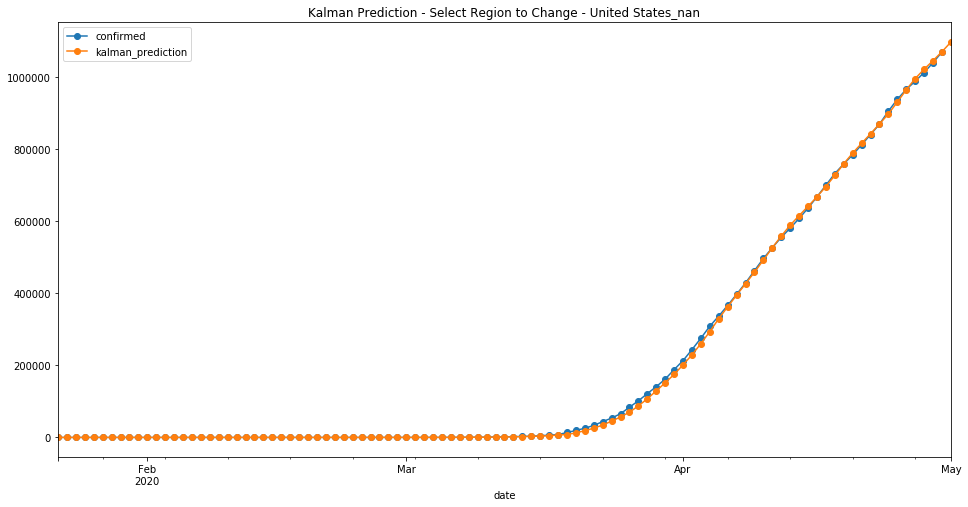

In [39]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [40]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='3G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpzvwx4sg9
  JVM stdout: /tmp/tmpzvwx4sg9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpzvwx4sg9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ----------------------------------------
H2O cluster uptime:         01 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 6 months and 4 days !!!
H2O cluster name:           H2O_from_python_unknownUser_7136mq
H2O cluster total nodes:    1
H2O cluster free memory:    3 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [41]:

train=train.fillna(0)

########################################################

### Joao - Training  progression - When growth happened 2020/03/05 to 2020/04/12
### Joao - FIX - Refresh this daily forward

### Old Fixed manual ### Last run 17April2020
##
#train_df=train[train['date']>'2020-03-04']
#train_df=train[train['date']<'2020-04-16']
#boots=train_df[train_df['date']>='2020-04-08'] # some bootstrap to give more weight for recent days
#train_df=train_df.append([boots[boots['date']>='2020-04-12']]*1000,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
#region_to_train=my_train_list
#train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
#test=train[train['date']>='2020-04-03']
#test=test[test['date']<'2020-04-17']
#test_v2=test[test['region'].isin(region_to_train)]
#valid_v2=test_v2[test_v2['date']>='2020-04-16']

########################################################

to_day=pd.to_datetime('today')
first_train_date=(to_day+pd.DateOffset(days=-45)).strftime('%Y-%m-%d')
last_train_date=(to_day+pd.DateOffset(days=-1)).strftime('%Y-%m-%d')
first_bootstrap_date=(to_day+pd.DateOffset(days=-9)).strftime('%Y-%m-%d')
boost_bootstrap_date=(to_day+pd.DateOffset(days=-4)).strftime('%Y-%m-%d')
first_test_date=(to_day+pd.DateOffset(days=-10)).strftime('%Y-%m-%d')
last_test_date=to_day.strftime('%Y-%m-%d')
first_valid_date=(to_day+pd.DateOffset(days=-2)).strftime('%Y-%m-%d')

print('first_train_date=',first_train_date)
print('last_train_date=',last_train_date)
print('first_bootstrap_date=',first_bootstrap_date)
print('boost_bootstrap_date=',boost_bootstrap_date)
print('first_test_date=',first_test_date)
print('last_test_date=',last_test_date)
print('first_valid_date=',first_valid_date)

train_df=train[train['date']>first_train_date]
train_df=train[train['date']<last_train_date]
boots=train_df[train_df['date']>=first_bootstrap_date] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>=boost_bootstrap_date]]*100,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>first_test_date]
test=test[test['date']<=last_test_date]
test_v2=test[test['region'].isin(region_to_train)]
valid_v2=test_v2[test_v2['date']>=first_valid_date]


first_train_date= 2020-03-17
last_train_date= 2020-04-30
first_bootstrap_date= 2020-04-22
boost_bootstrap_date= 2020-04-27
first_test_date= 2020-04-21
last_test_date= 2020-05-01
first_valid_date= 2020-04-29


In [42]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          #  ,'population_percent_infected_rate_confirmed'
          #  ,'delta_new_cases'
          #  ,'delta_new_cases_per_1M_hab'
          ]

In [43]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [44]:
pred2.iloc[175:195]

0  confirmed       date          region
175  1675.0       1678 2020-04-27  Azerbaijan_nan
176  1712.0       1717 2020-04-28  Azerbaijan_nan
177  1750.0       1766 2020-04-29  Azerbaijan_nan
178  1802.0       1804 2020-04-30  Azerbaijan_nan
179  1837.0          0 2020-05-01  Azerbaijan_nan
180    69.0         65 2020-04-22     Bahamas_nan
181    68.0         72 2020-04-23     Bahamas_nan
182    76.0         73 2020-04-24     Bahamas_nan
183    76.0         78 2020-04-25     Bahamas_nan
184    83.0         80 2020-04-26     Bahamas_nan
185    84.0         80 2020-04-27     Bahamas_nan
186    82.0         80 2020-04-28     Bahamas_nan
187    81.0         80 2020-04-29     Bahamas_nan
188    82.0         81 2020-04-30     Bahamas_nan
189    81.0          0 2020-05-01     Bahamas_nan
190  2061.0       2027 2020-04-22     Bahrain_nan
191  2107.0       2217 2020-04-23     Bahrain_nan
192  2372.0       2518 2020-04-24     Bahrain_nan
193  2756.0       2588 2020-04-25     Bahrain_nan
194  2734.0       2647 2020-04-26     Bahrain_nan

In [45]:
pred2.iloc[220:240]

0  confirmed       date       region
220   7290.0       7281 2020-04-22  Belarus_nan
221   7632.0       8022 2020-04-23  Belarus_nan
222   8643.0       8773 2020-04-24  Belarus_nan
223   9334.0       9590 2020-04-25  Belarus_nan
224  10353.0      10463 2020-04-26  Belarus_nan
225  11480.0      11289 2020-04-27  Belarus_nan
226  11964.0      12208 2020-04-28  Belarus_nan
227  13000.0      13181 2020-04-29  Belarus_nan
228  14075.0      14027 2020-04-30  Belarus_nan
229  14863.0          0 2020-05-01  Belarus_nan
230  42401.0      41889 2020-04-22  Belgium_nan
231  42845.0      42797 2020-04-23  Belgium_nan
232  43827.0      44293 2020-04-24  Belgium_nan
233  45534.0      45325 2020-04-25  Belgium_nan
234  46449.0      46134 2020-04-26  Belgium_nan
235  46977.0      46687 2020-04-27  Belgium_nan
236  47356.0      47334 2020-04-28  Belgium_nan
237  48069.0      47859 2020-04-29  Belgium_nan
238  48576.0      48519 2020-04-30  Belgium_nan
239  49284.0          0 2020-05-01  Belgium_nan

In [46]:
#
train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time


test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

valid_h20_v2=h2o.H2OFrame(valid_v2)

#training_columns = ['region','1_day_change', '3_day_change', '7_day_change','1_day_change_rate','3_day_change_rate','7_day_change_rate','last_day', 'kalman_prediction','infected_rate', 'min', 'max']
training_cols_v2 = ['region']+x_col+['population_percent_infected_rate_confirmed','delta_new_cases','delta_new_cases_per_1M_hab']
training_columns = training_cols_v2

# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Model V2
model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=23)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2, validation_frame=valid_h20_v2)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%


In [47]:
#Print Model

print('# MSE on the training data = ',model_v2.mse())
print('# MSE on the validation data = ',model_v2.mse(valid=True))
print('# R^2 on the training data = ',model_v2.r2())
print('# R^2 on the validation data',model_v2.r2(valid=True))

# MSE on the training data =  996882.6344618647
# MSE on the validation data =  11694939406.722773
# R^2 on the training data =  0.9999586353773916
# R^2 on the validation data 0.48421002751589215


In [48]:
model_v2.show()

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1588316013044_1


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 996882.6344618647
RMSE: 998.4401005878443
MAE: 81.63102767053753
RMSLE: 0.09255461302830079
Mean Residual Deviance: 996882.6344618647

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 11694939406.722773
RMSE: 108143.14313317684
MAE: 26688.078540640843
RMSLE: 5.7108842917750255
Mean Residual Deviance: 11694939406.722773
Scoring History: 


timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance    validation_rmse     validation_mae      validation_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------  ------------------  ------------------  ---------------------
     2020-05-01 06:53:44  0.126 sec   0.0                nan                 nan                 nan                  nan                 nan                 nan
     2020-05-01 06:53:45  0.704 sec   1.0                8766.925525832106   532.5256013506944   76858983.17548656    111824.9320487013   27495.276711309525  12504815427.696663
     2020-05-01 06:53:45  0.899 sec   2.0                5966.52022791753    318.57541471341034  35599363.63014906    110617.68862444439  27033.95745326451   12236273036.614532
     2020-05-01 06:53:45  1.028 sec   3.0                5308.259910345919   293.59327287635284  28177623.275785662   110057.23238553942  26960.031036861365  12112594400.364628
     2020-05-01 06:53:46  1.194 sec   4.0                4808.315047140546   267.036050370388    23119893.592558194   109025.06210400099  27186.774177478608  11886464166.781271
---  ---                  ---         ---                ---                 ---                 ---                  ---                 ---                 ---
     2020-05-01 06:53:56  12.135 sec  186.0              1087.5752807067101  89.87524657042172   1182819.9912042792   107937.494987709    26722.960061489055  11650502824.221704
     2020-05-01 06:54:00  16.144 sec  274.0              1060.2857743560257  87.02709900935473   1124205.9233017573   108085.79108096333  26695.11259860574   11682538233.597652
     2020-05-01 06:54:04  20.163 sec  363.0              1060.5128989662155  85.70689131625205   1124687.6088737263   108007.50793872775  26691.479237428073  11665621771.134338
     2020-05-01 06:54:09  24.202 sec  443.0              1039.862178184032   83.21072210057139   1081313.3496176393   108000.36367302103  26676.00842936792   11664078553.504799
     2020-05-01 06:54:11  26.951 sec  500.0              998.4401005878443   81.63102767053753   996882.6344618647    108143.14313317684  26688.078540640843  11694939406.722773


See the whole table with table.as_data_frame()
Variable Importances: 


variable                                    relative_importance    scaled_importance    percentage
------------------------------------------  ---------------------  -------------------  ------------
kalman_prediction                           5.21378e+16            1                    0.330222
last_day                                    3.83686e+16            0.735907             0.243013
7_day_change                                2.44351e+16            0.468663             0.154763
delta_new_cases                             2.05424e+16            0.394003             0.130109
1_day_change                                8.48828e+15            0.162805             0.0537617
3_day_change                                7.56824e+15            0.145159             0.0479346
region                                      3.54494e+15            0.0679918            0.0224524
population_percent_infected_rate_confirmed  1.22191e+15            0.0234361            0.00773913
infected_rate                               1.16987e+15            0.0224381            0.00740955
min                                         1.21355e+14            0.00232758           0.000768618
delta_new_cases_per_1M_hab                  1.11057e+14            0.00213007           0.000703397
1_day_change_rate                           6.68166e+13            0.00128154           0.000423193
7_day_change_rate                           5.03355e+13            0.000965432          0.000318807
max                                         3.02514e+13            0.000580221          0.000191602
3_day_change_rate                           3.00657e+13            0.00057666           0.000190426

In [49]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
modlv2=model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF
modlv2.sort_values('percentage',ascending=False)

variable  relative_importance  \
0                            kalman_prediction         5.213775e+16   
1                                     last_day         3.836856e+16   
2                                 7_day_change         2.443506e+16   
3                              delta_new_cases         2.054245e+16   
4                                 1_day_change         8.488276e+15   
5                                 3_day_change         7.568242e+15   
6                                       region         3.544938e+15   
7   population_percent_infected_rate_confirmed         1.221907e+15   
8                                infected_rate         1.169872e+15   
9                                          min         1.213547e+14   
10                  delta_new_cases_per_1M_hab         1.110572e+14   
11                           1_day_change_rate         6.681657e+13   
12                           7_day_change_rate         5.033548e+13   
13                                         max         3.025144e+13   
14                           3_day_change_rate         3.006573e+13   

    scaled_importance  percentage  
0            1.000000    0.330222  
1            0.735907    0.243013  
2            0.468663    0.154763  
3            0.394003    0.130109  
4            0.162805    0.053762  
5            0.145159    0.047935  
6            0.067992    0.022452  
7            0.023436    0.007739  
8            0.022438    0.007410  
9            0.002328    0.000769  
10           0.002130    0.000703  
11           0.001282    0.000423  
12           0.000965    0.000319  
13           0.000580    0.000192  
14           0.000577    0.000190

In [50]:
## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


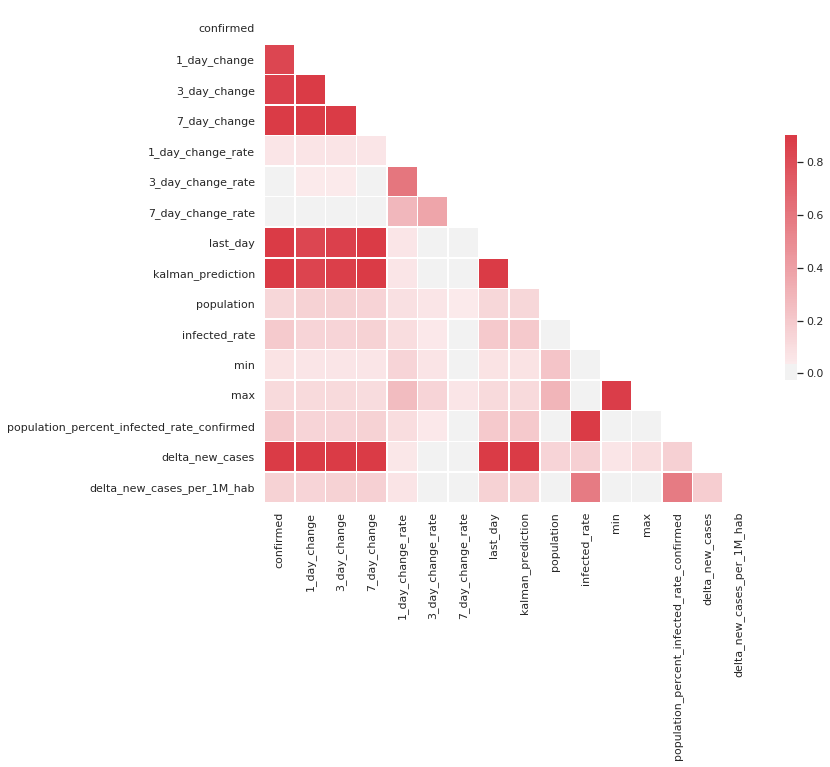

In [51]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [52]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed                                     1.000000
1_day_change                                  0.838633
3_day_change                                  0.867210
7_day_change                                  0.896323
1_day_change_rate                             0.058655
3_day_change_rate                             0.024469
7_day_change_rate                             0.002292
last_day                                      0.962767
kalman_prediction                             0.963851
population                                    0.131579
infected_rate                                 0.196572
min                                           0.073299
max                                           0.117714
population_percent_infected_rate_confirmed    0.196572
delta_new_cases                               0.912116
delta_new_cases_per_1M_hab                    0.160725
Name: confirmed, dtype: float64


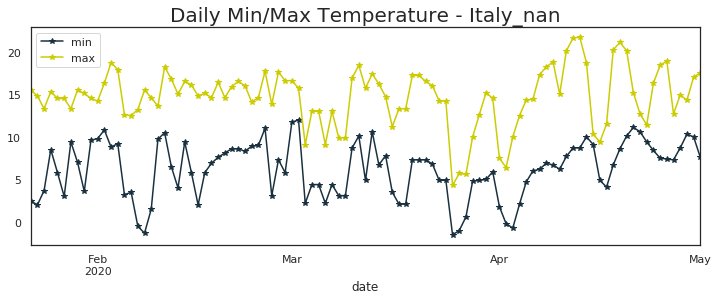

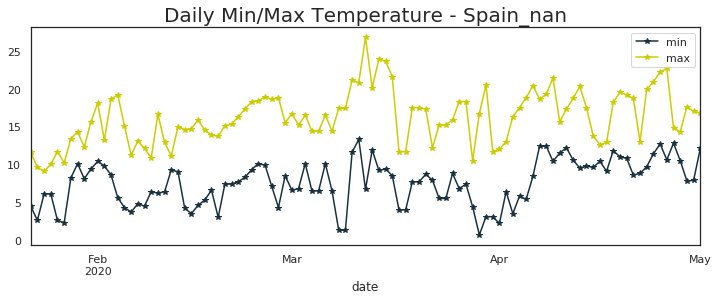

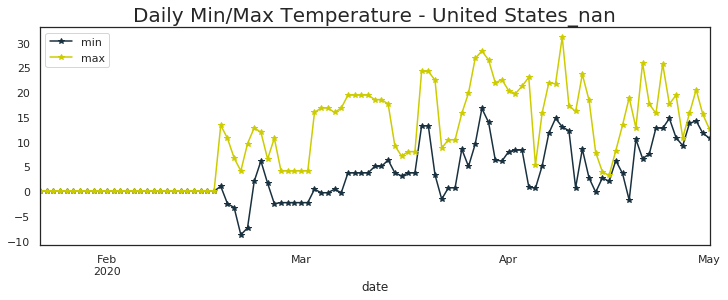

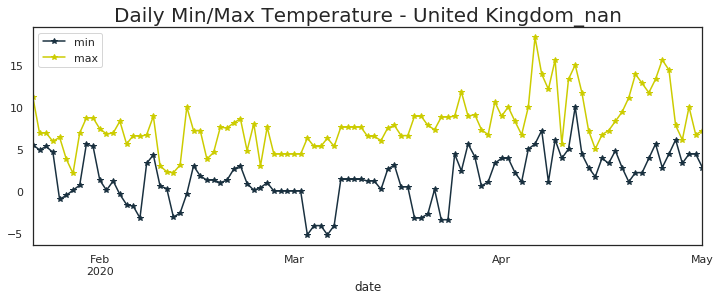

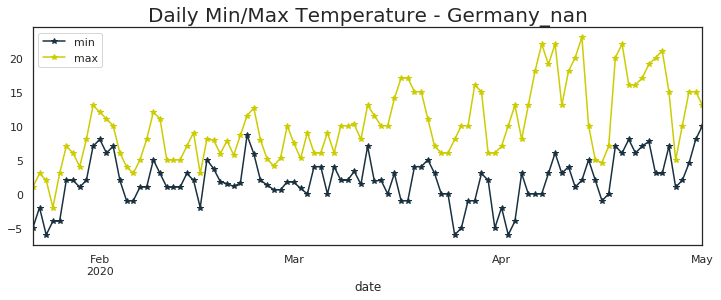

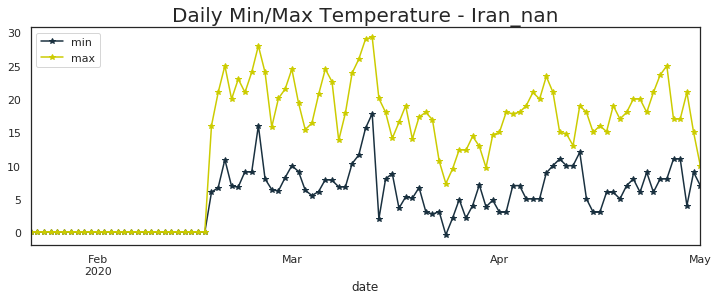

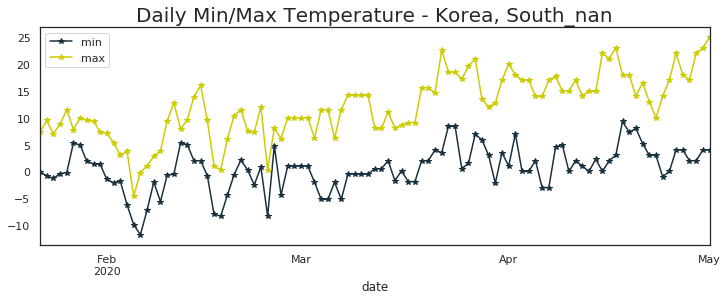

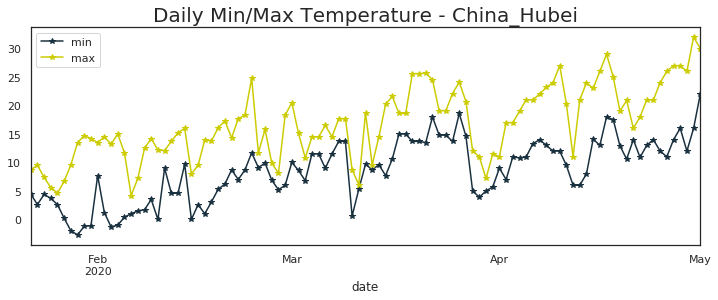

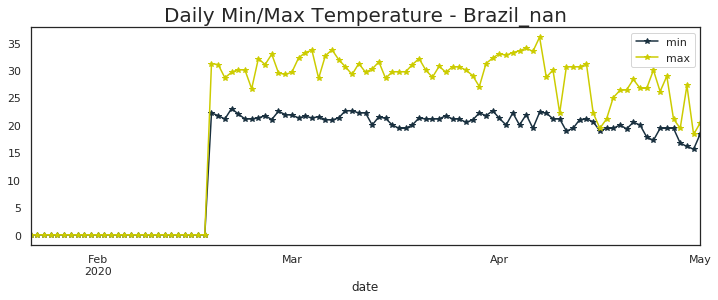

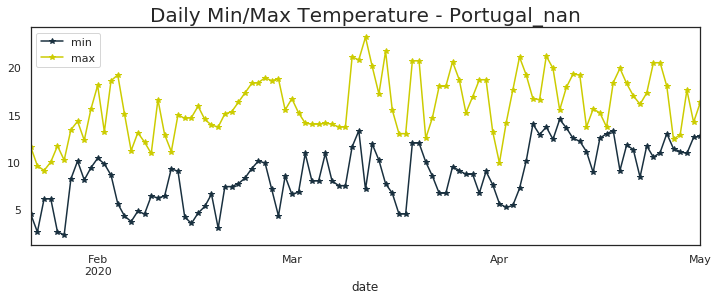

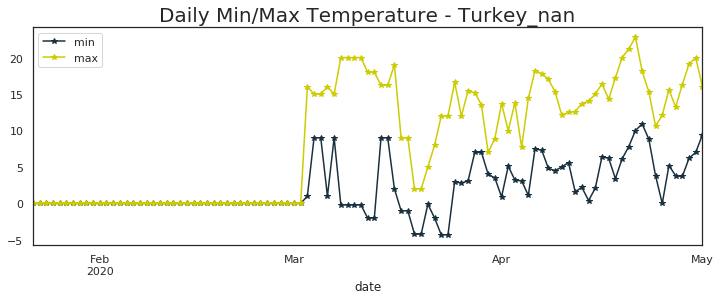

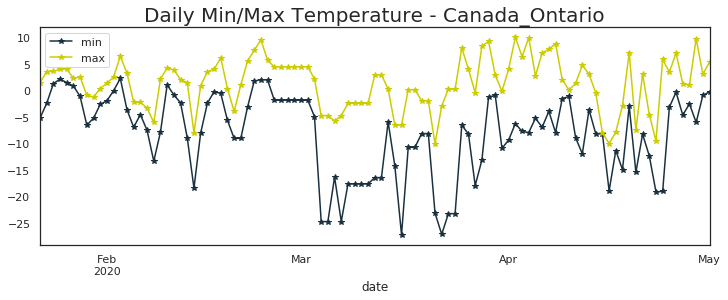

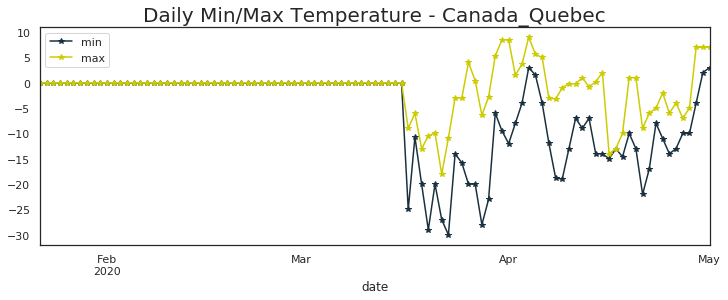

In [53]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan','Iran_nan',
          'Korea, South_nan','China_Hubei','Brazil_nan','Portugal_nan','Turkey_nan',
          'Canada_Ontario','Canada_Quebec']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [54]:
avg_temp=train[['region','confirmed','min','max']]  # from 20-02-20 to 06-04-2020
avg_temp=avg_temp.groupby(by='region').max()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                             min   max
region                                
United States_nan           16.7  31.1
Spain_nan                   13.3  26.8
Italy_nan                   12.0  21.7
United Kingdom_nan          10.0  18.3
France_nan                  13.0  23.0
Germany_nan                 10.0  23.0
Turkey_nan                  10.9  22.8
Russia_nan                  13.0  30.0
Iran_nan                    17.8  29.3
Brazil_nan                  23.0  36.0
China_Hubei                 22.0  32.0
Belgium_nan                 17.8  26.1
Netherlands_nan             13.9  26.1
Peru_nan                     0.0   0.0
India_nan                   29.0  42.0
Switzerland_nan             11.2  19.7
Canada_Quebec                3.0   9.0
Portugal_nan                14.5  23.2
Ecuador_nan                  0.0   0.0
Saudi Arabia_nan             0.0   0.0
Sweden_nan                   6.1  18.9
Ireland_nan                  0.0   0.0
Mexico_nan                  

### Kalman X Days Ahead Prediction

In [55]:
%%R

#install.packages('reshape')

NULL


In [56]:
%%R

require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL

### JOAO - FIX
#
### Flexy Days maximum forward prediction =A Hint!= "Error increases as number of days increases"
days_prediction<-max_days_prediction # Set i days prediction # max_days_prediction=90 days forward prediction with Kalman Filter

for (i in 1: days_prediction) { 
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [57]:
all_new=%R all_new

In [58]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

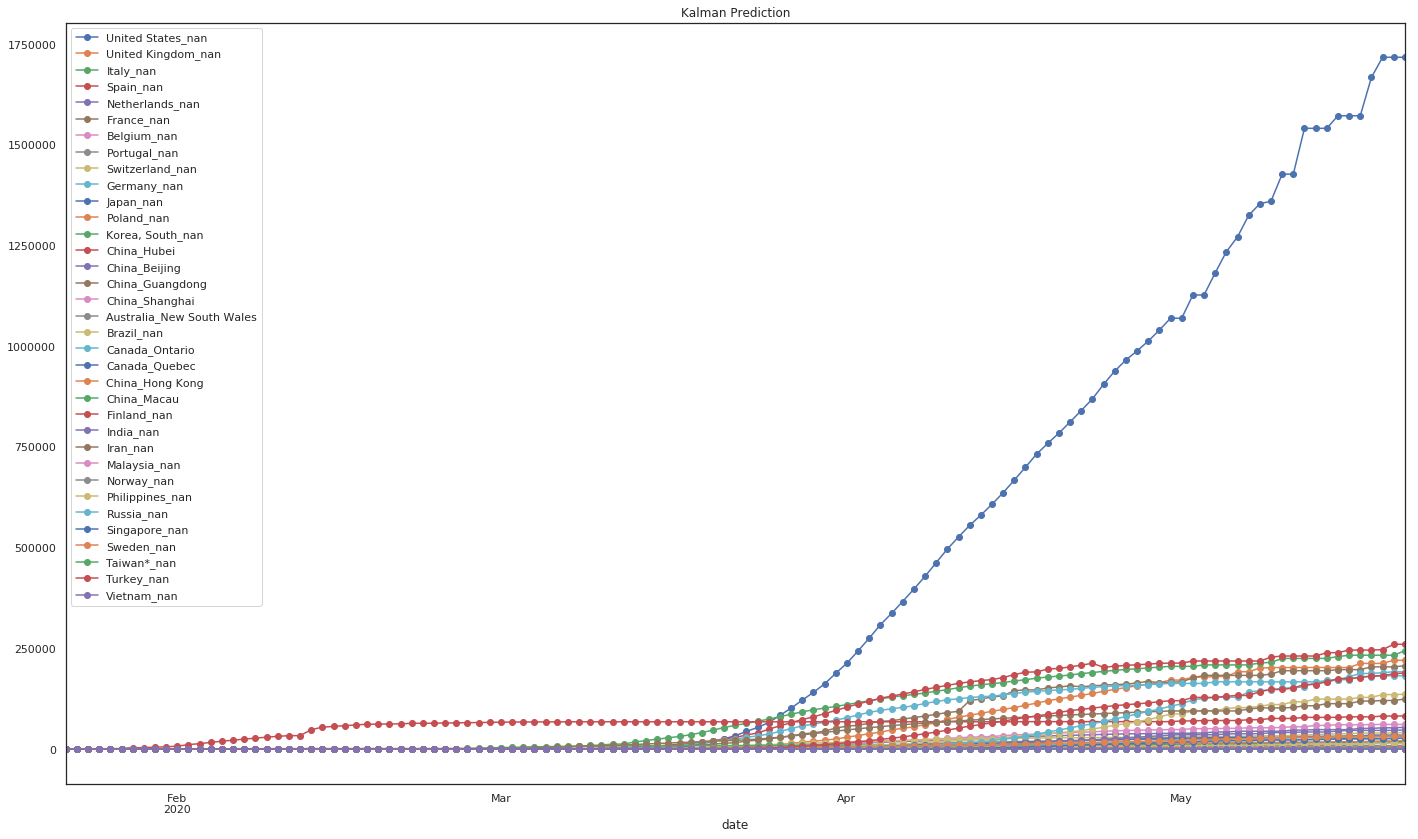

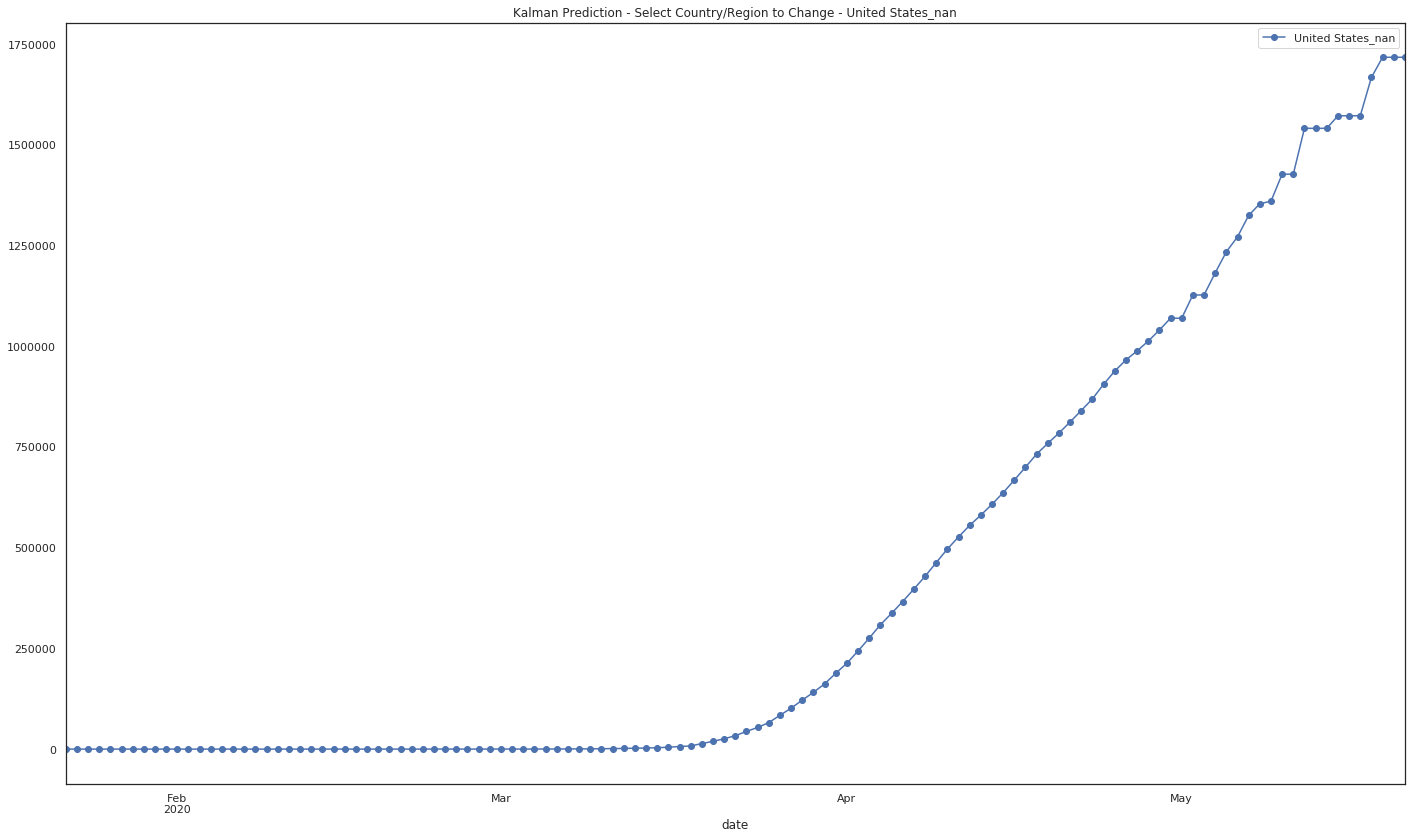

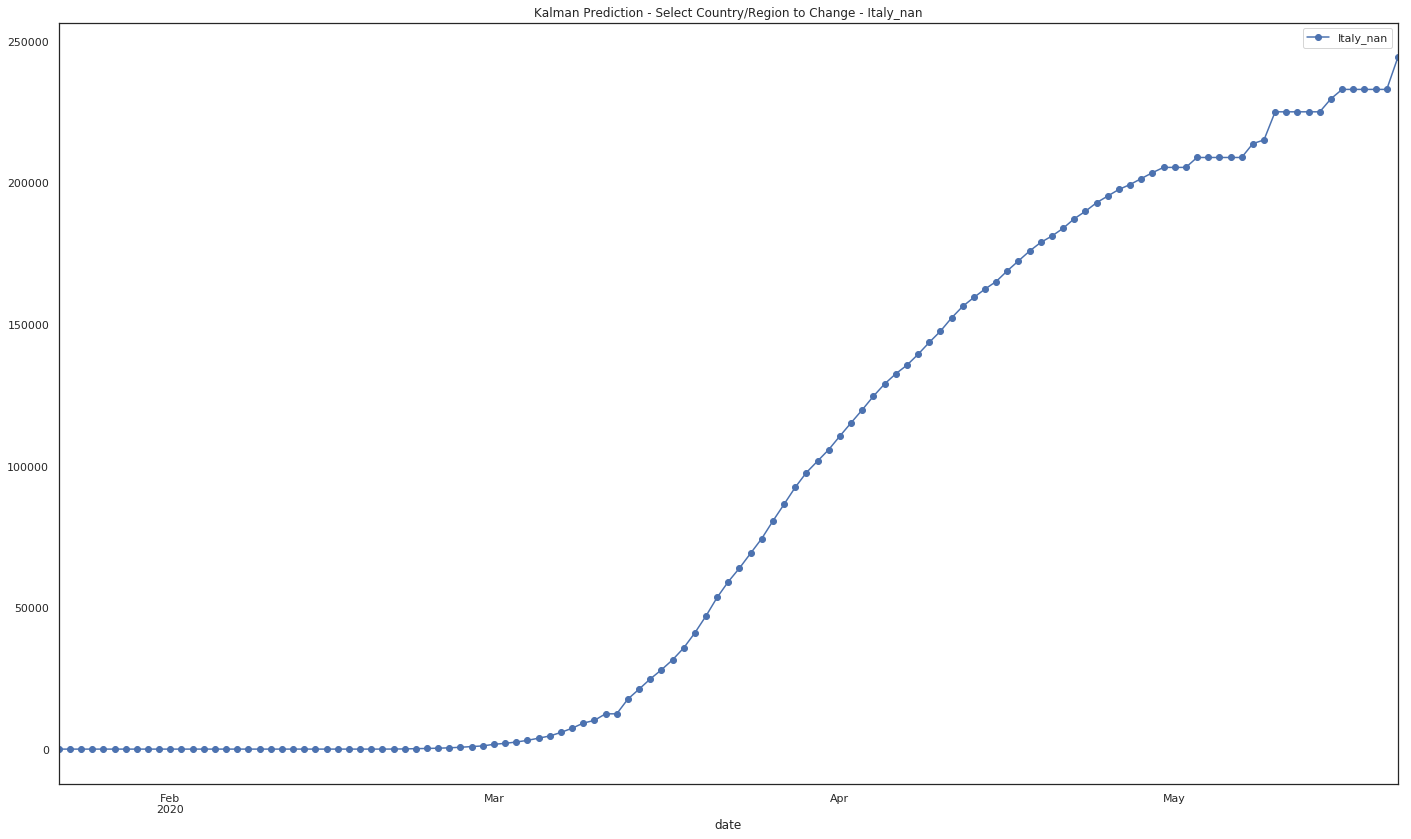

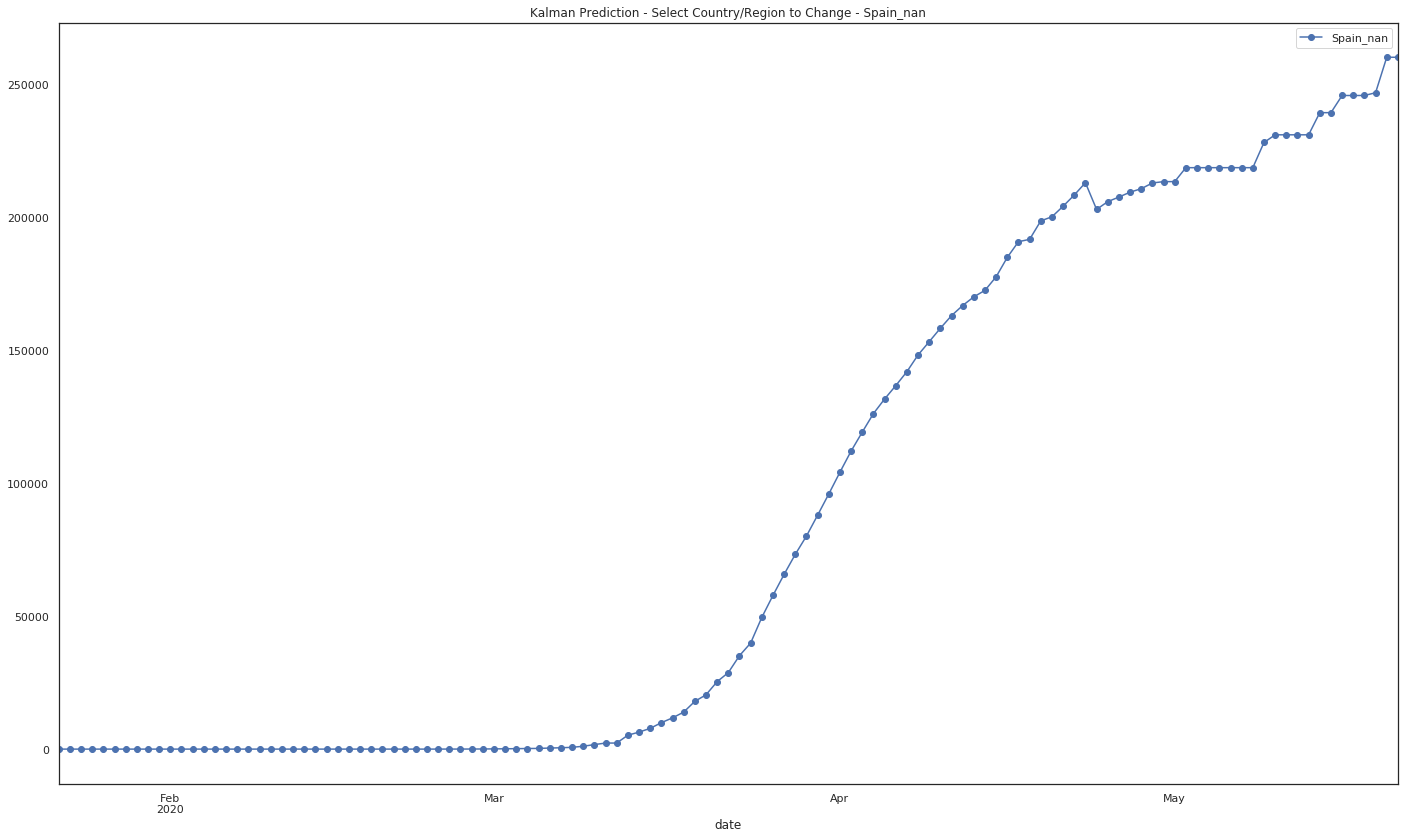

In [59]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
p_kalman2=all_new[['date','United States_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#
p_kalman3=all_new[['date','Italy_nan']] ## Joao
p_kalman3=p_kalman3.set_index(['date'])
p_kalman3.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman3.columns[0]))
#
p_kalman4=all_new[['date','Spain_nan']] ## Joao
p_kalman4=p_kalman4.set_index(['date'])
p_kalman4.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman4.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


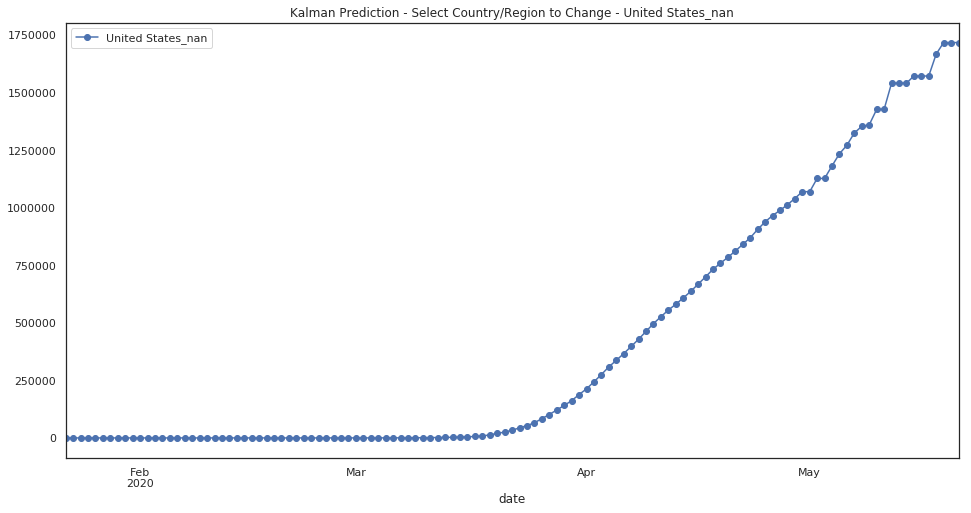

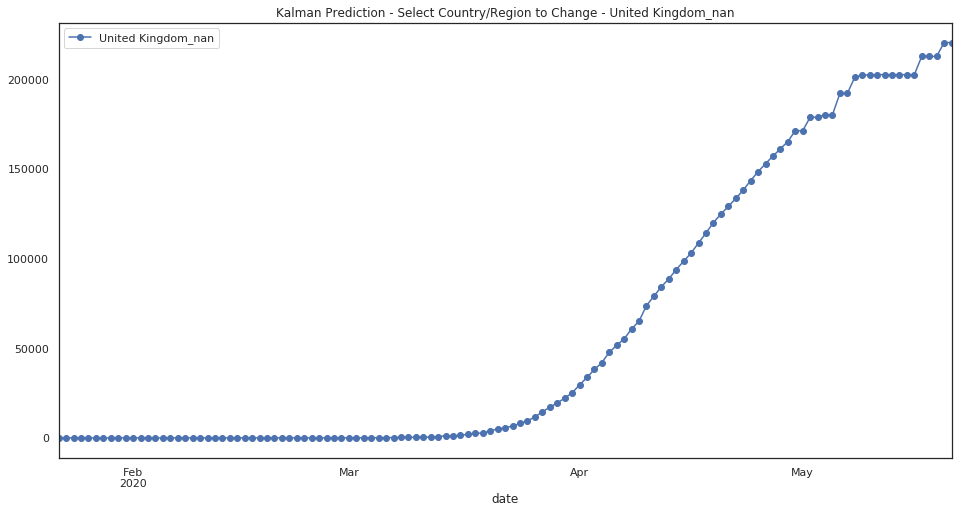

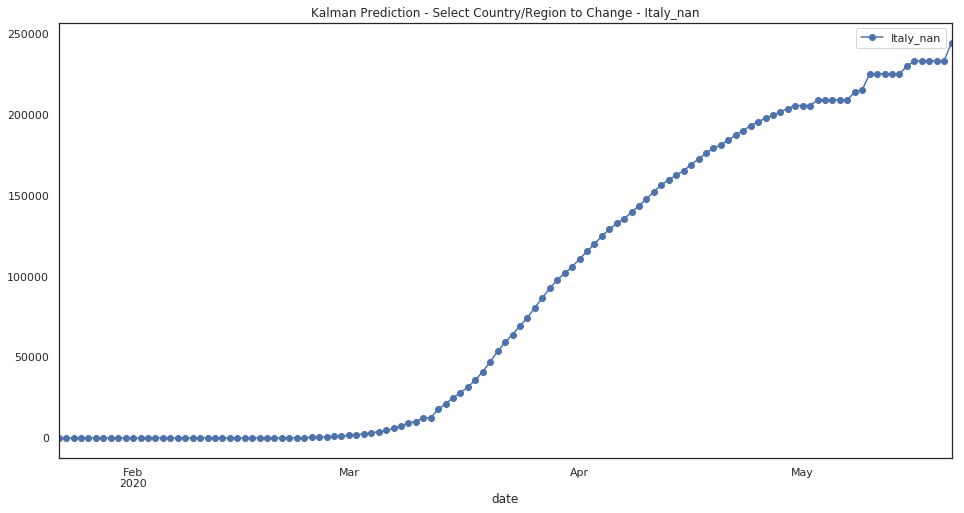

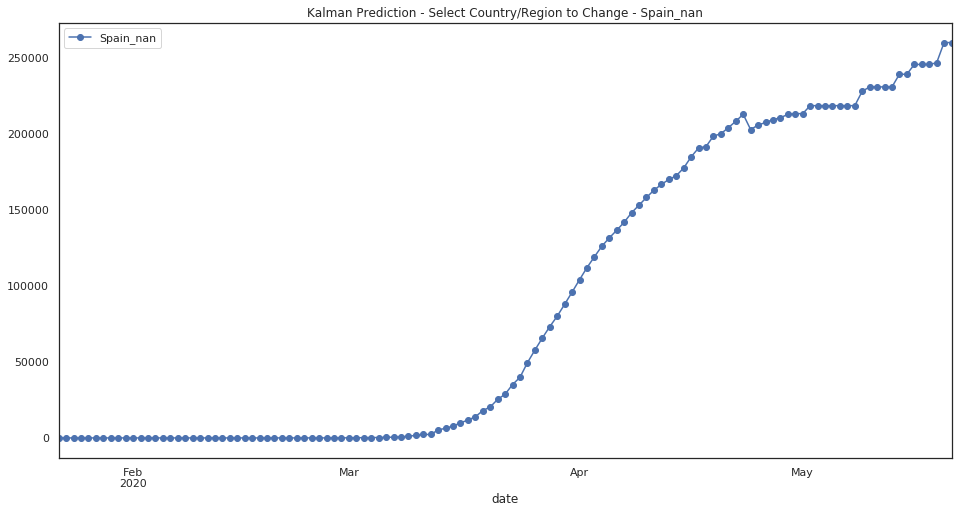

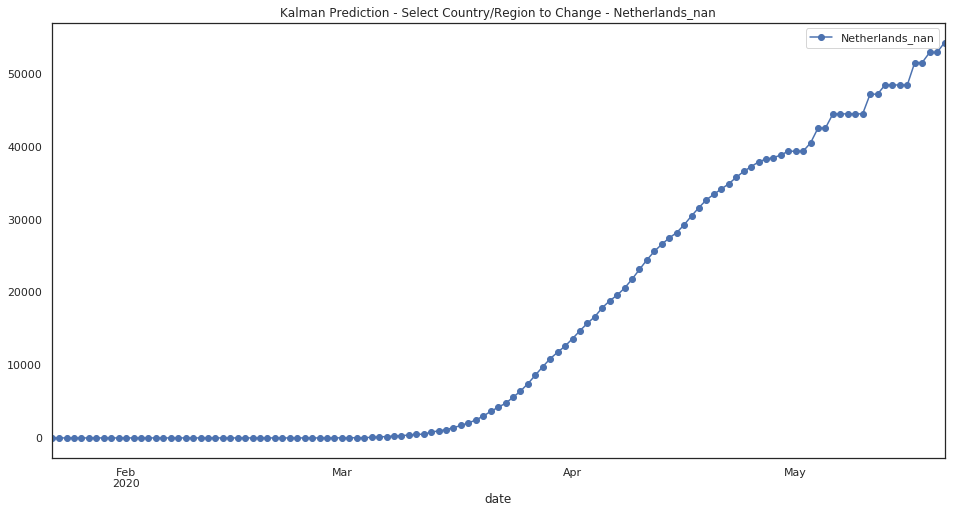

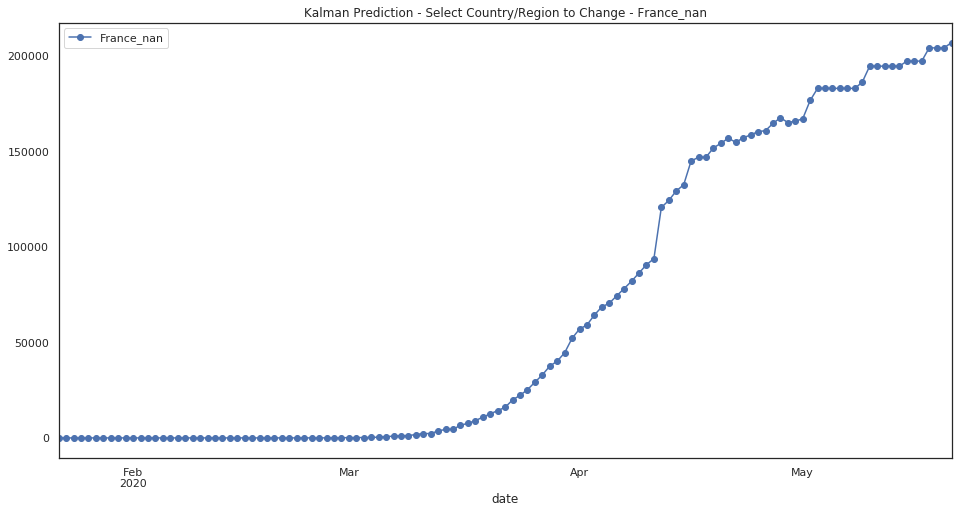

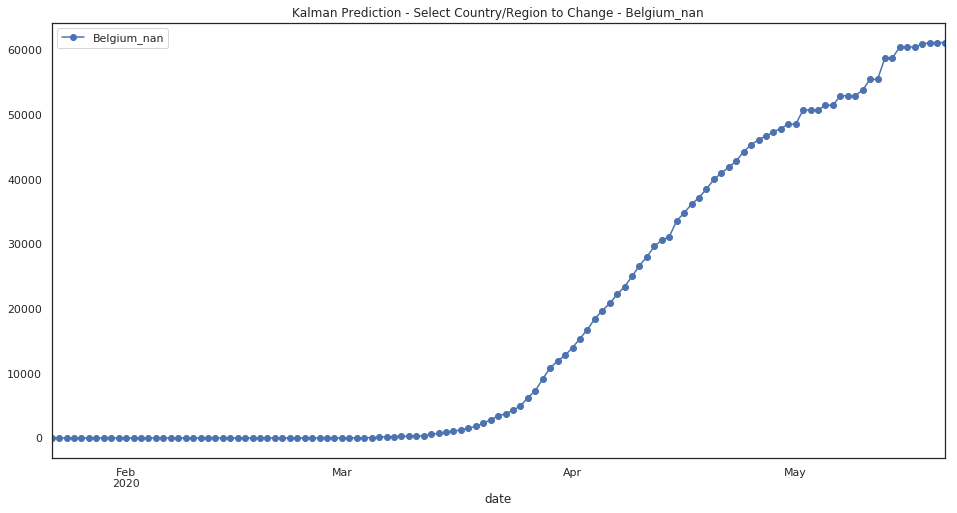

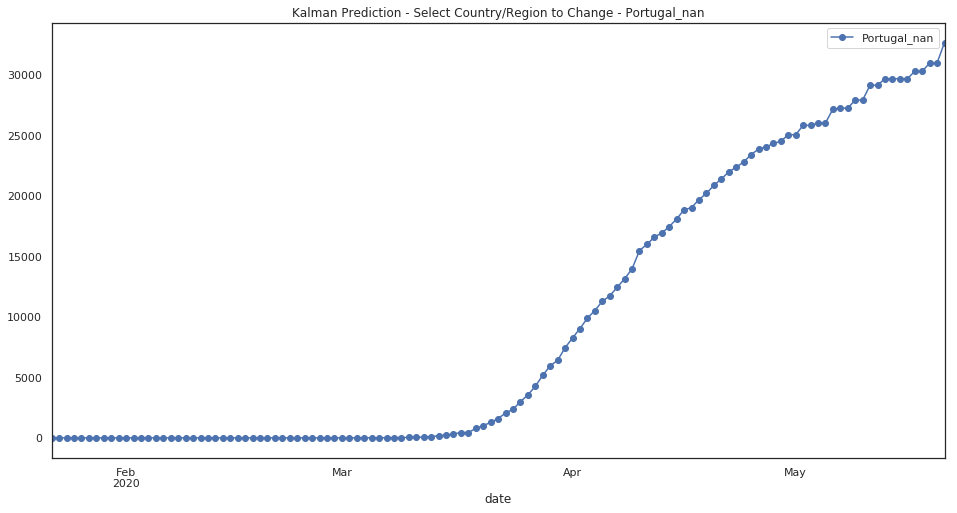

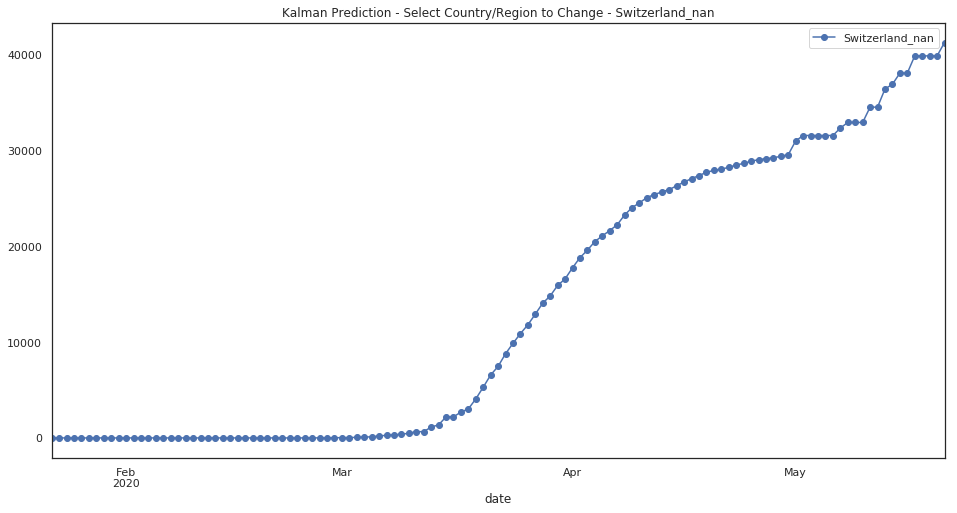

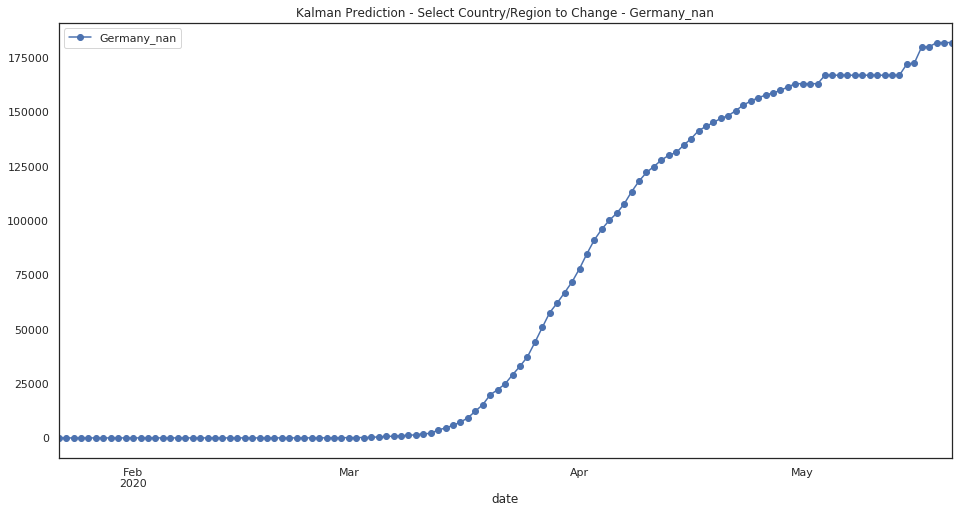

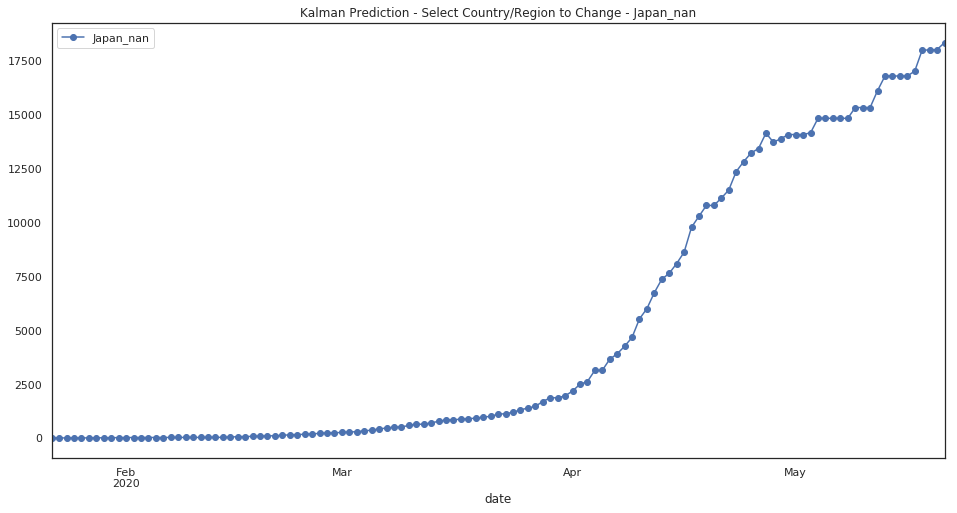

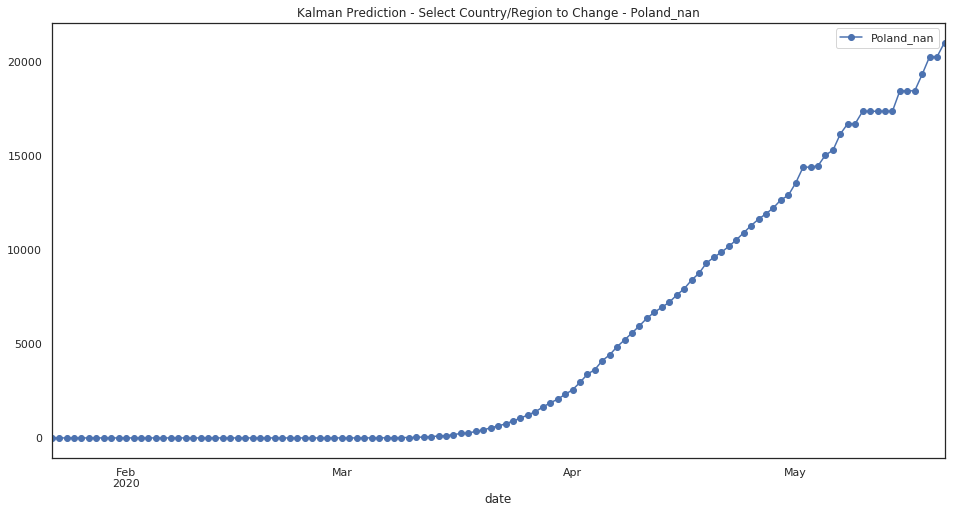

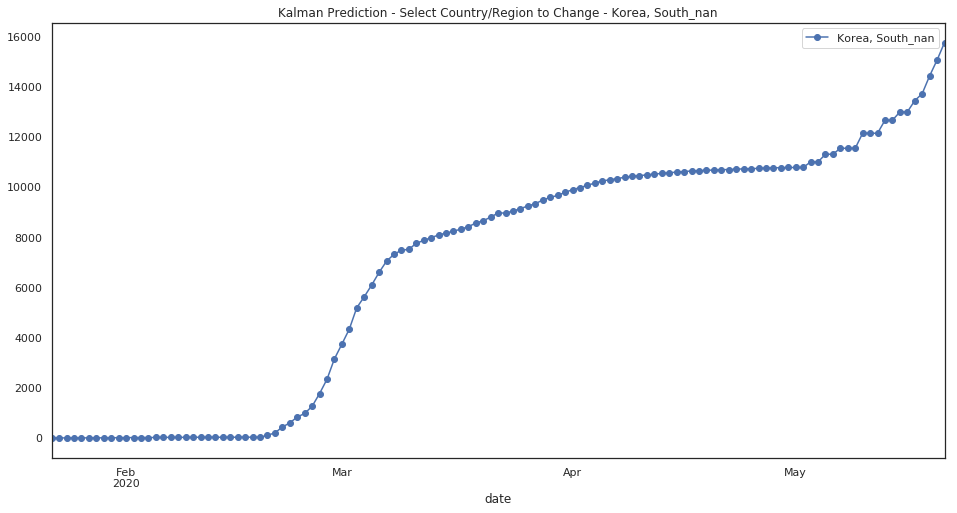

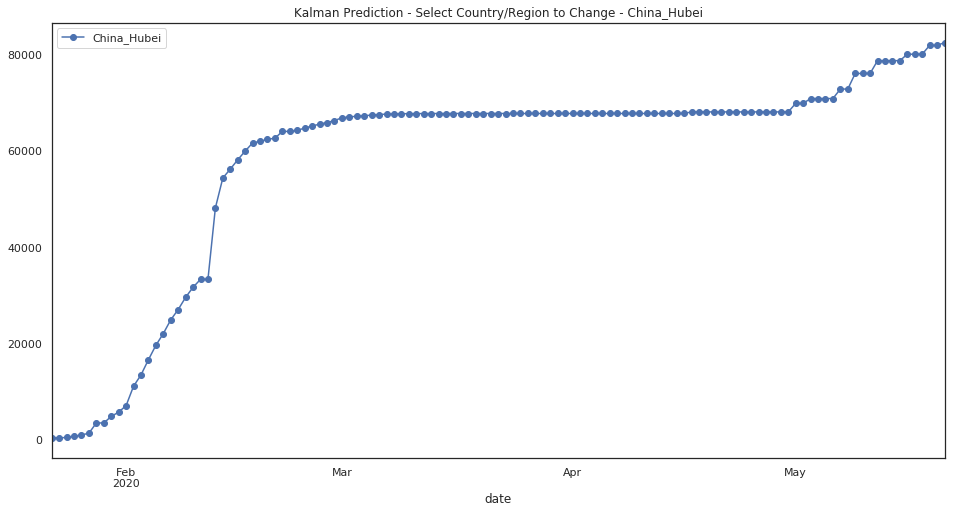

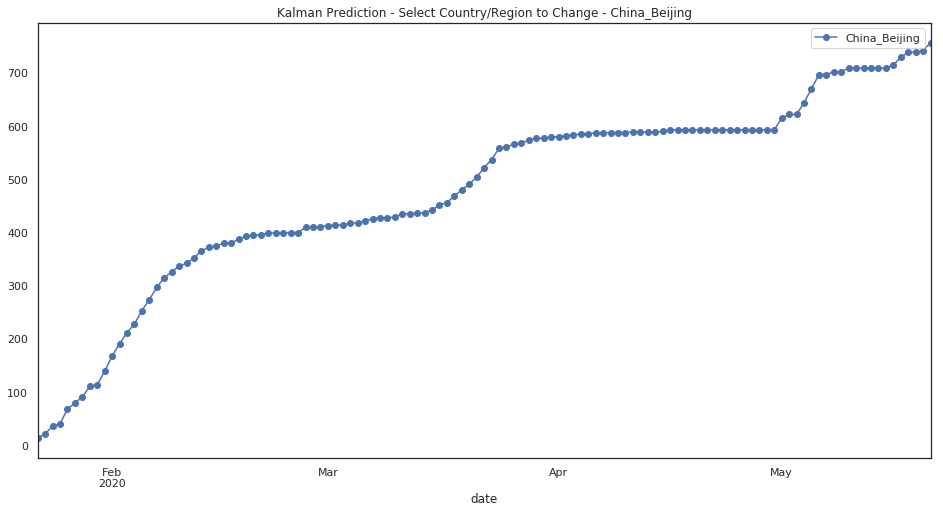

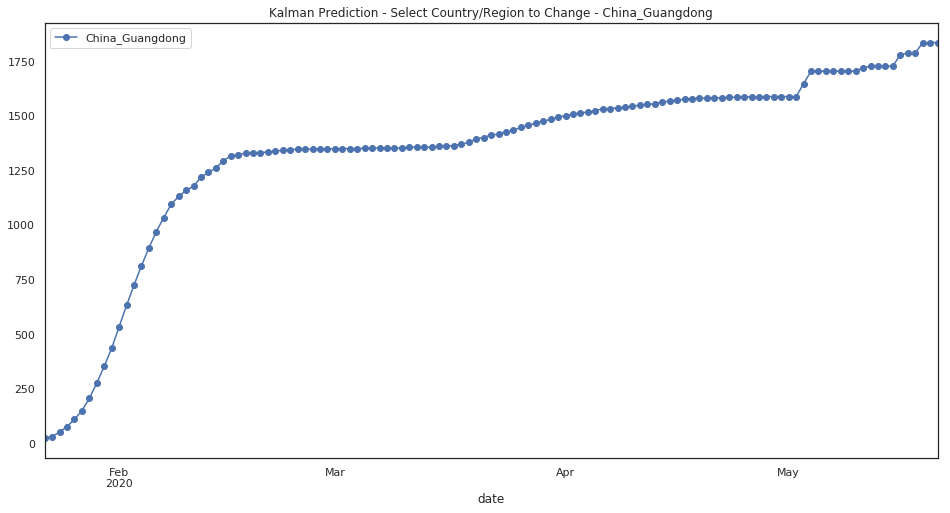

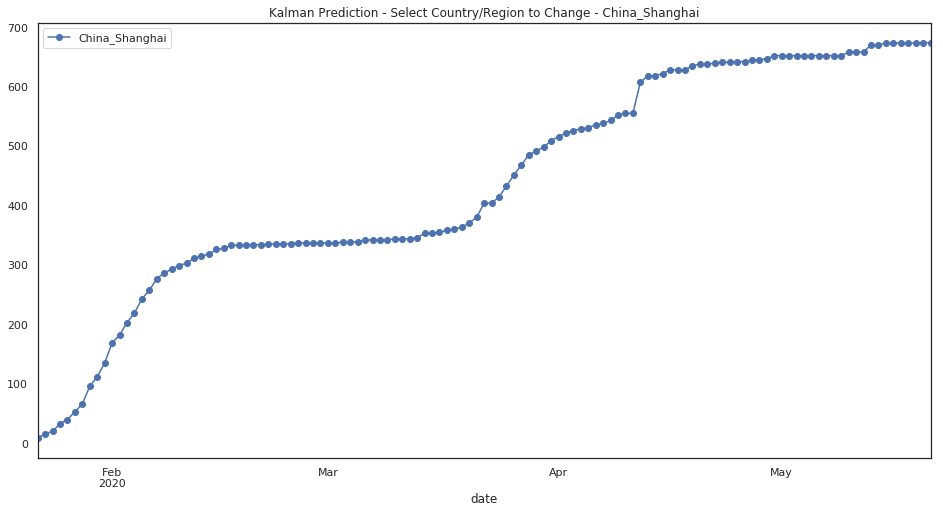

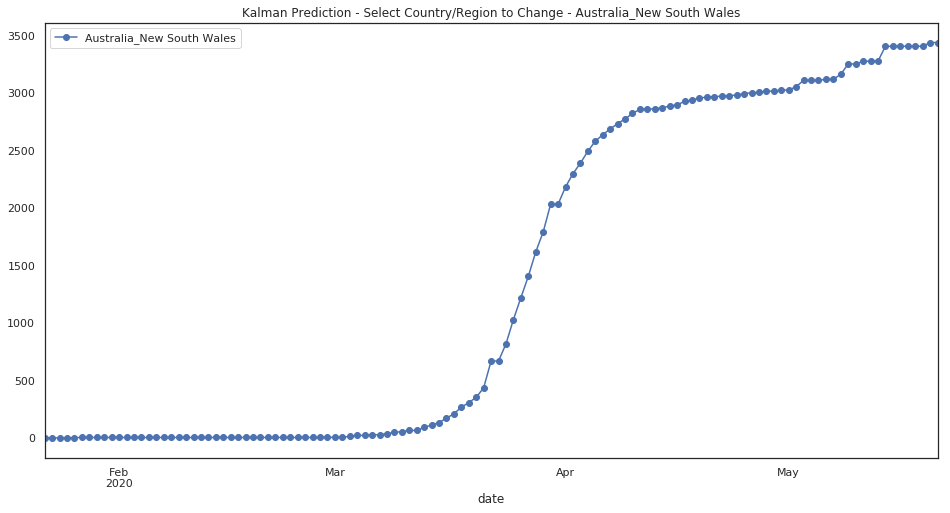

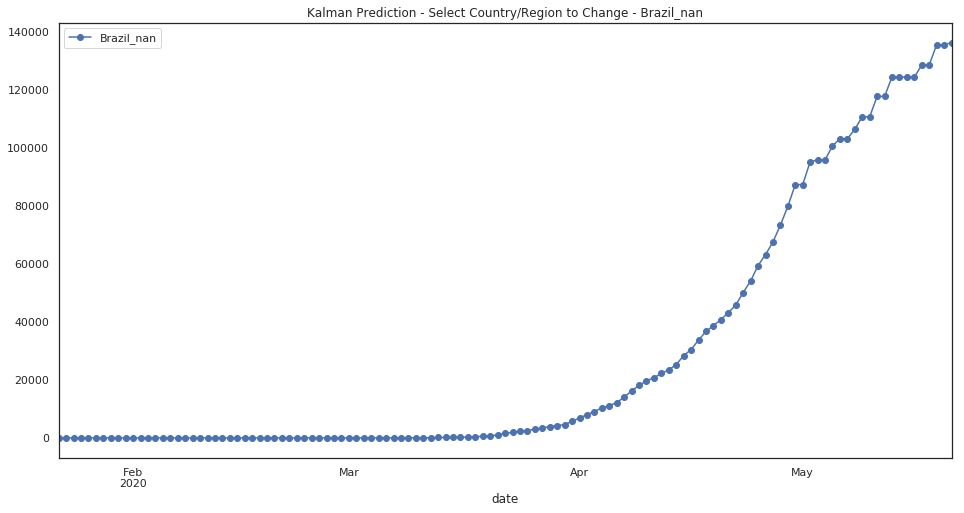

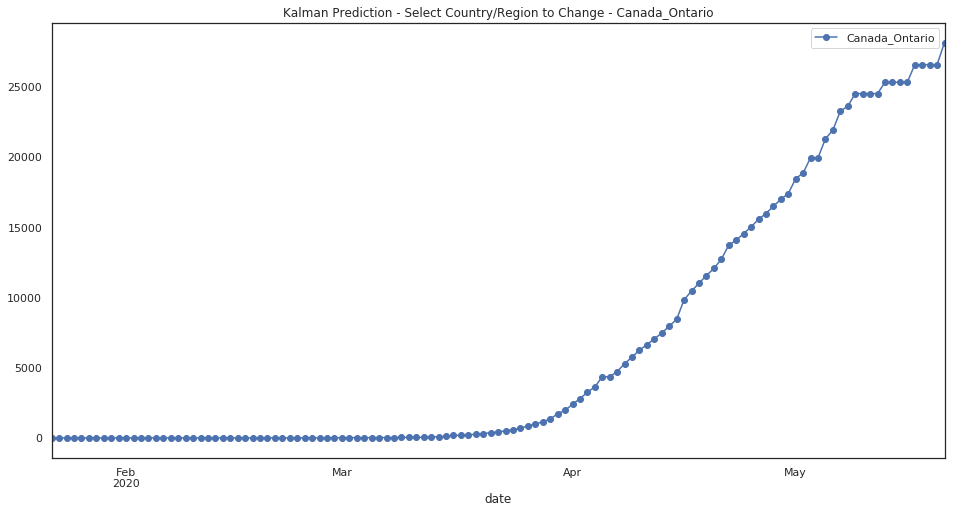

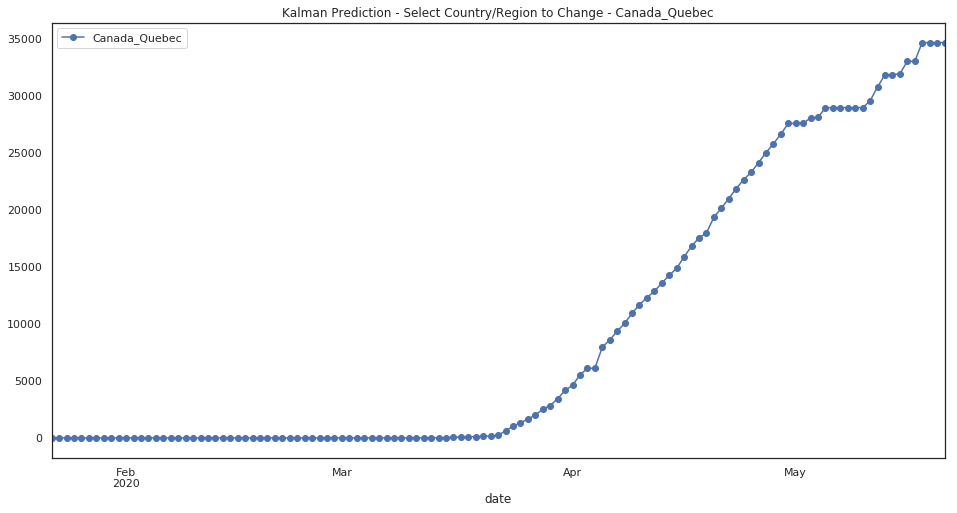

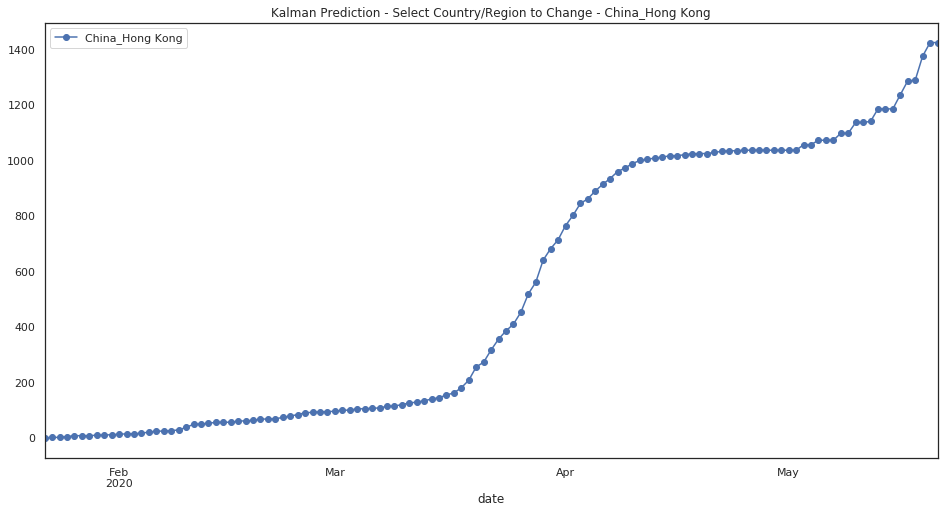

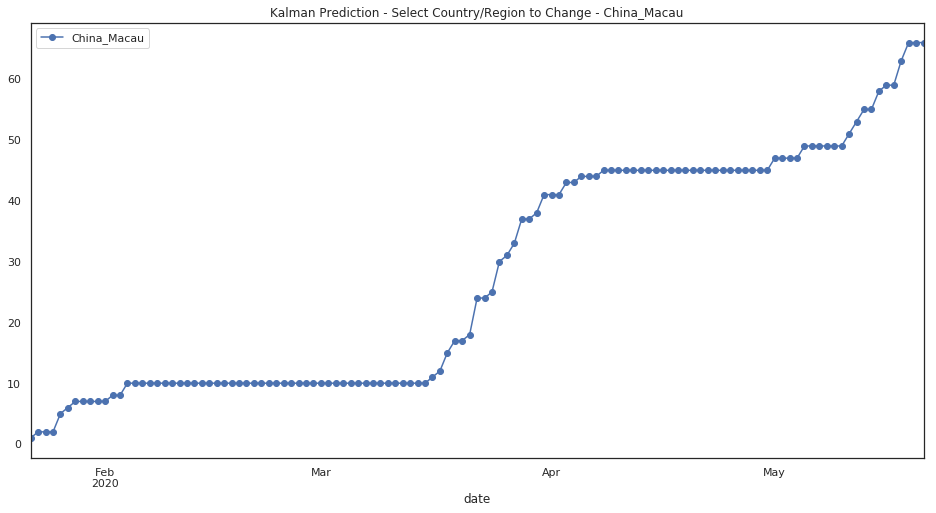

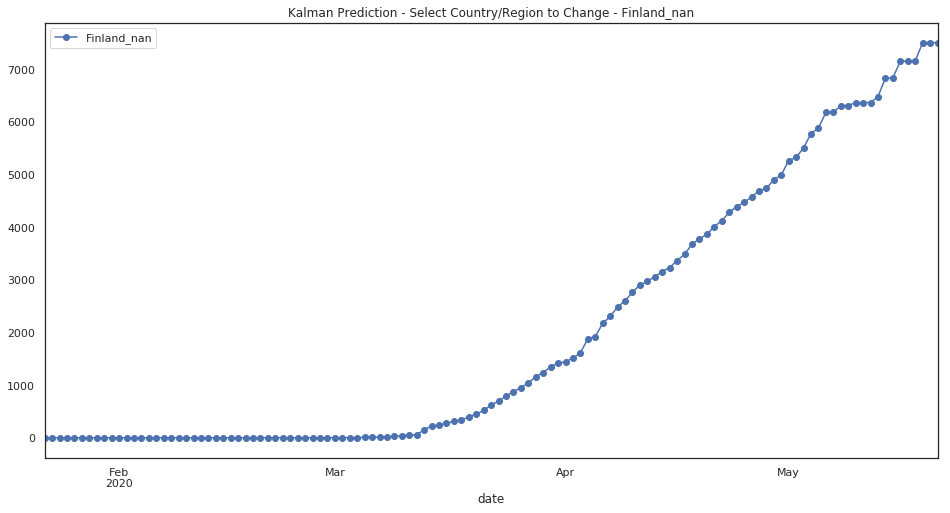

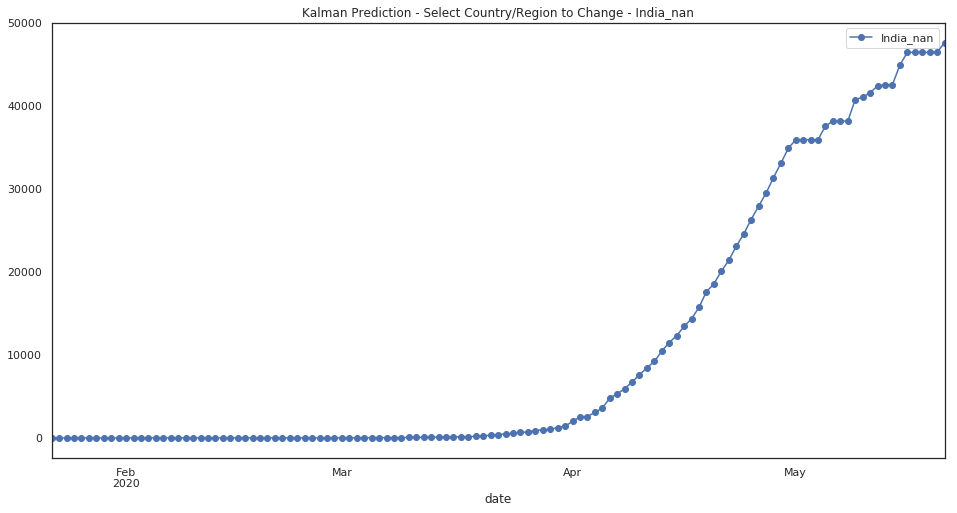

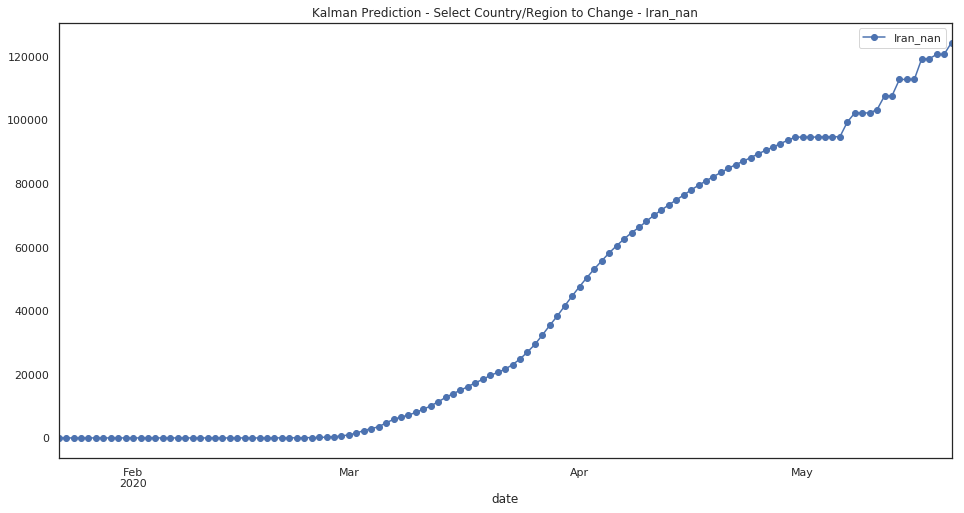

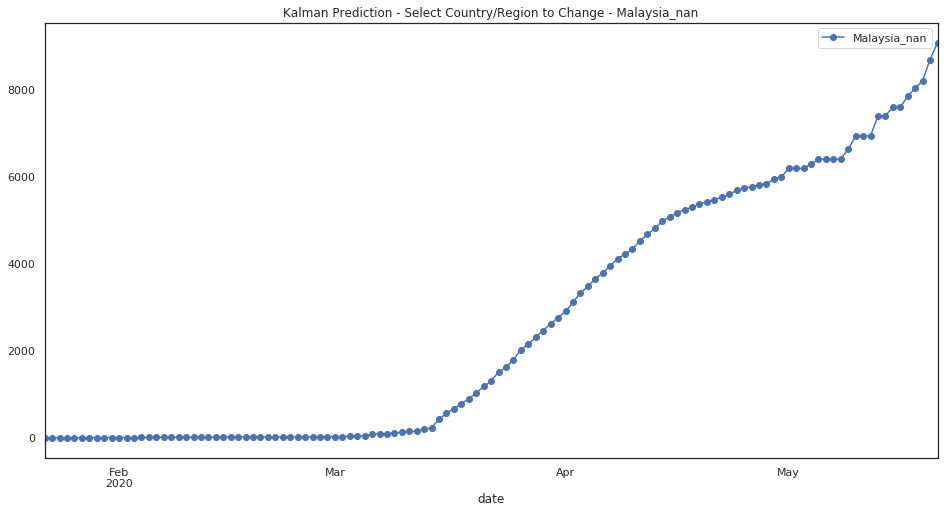

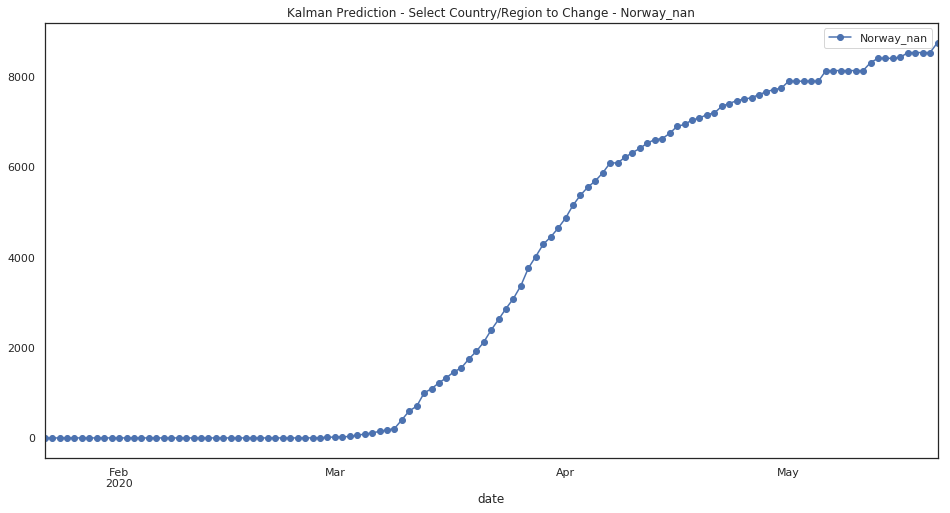

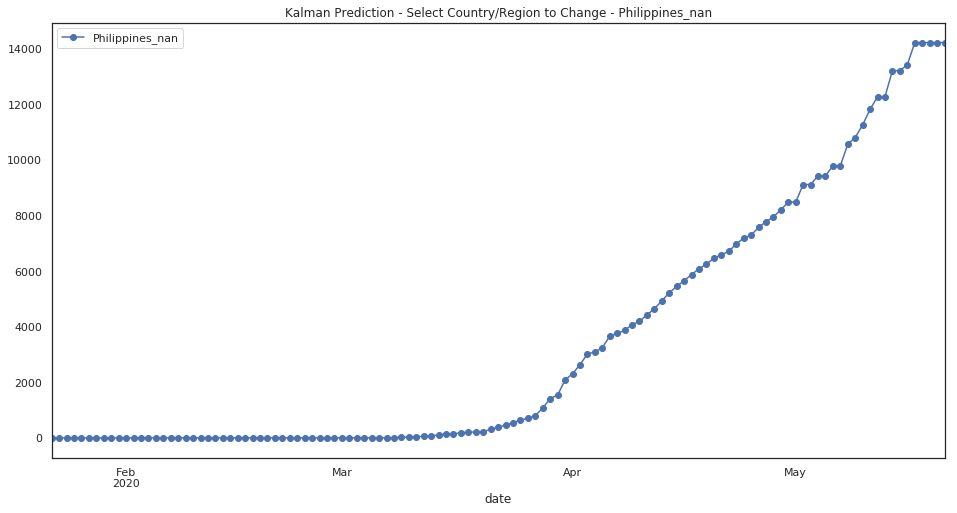

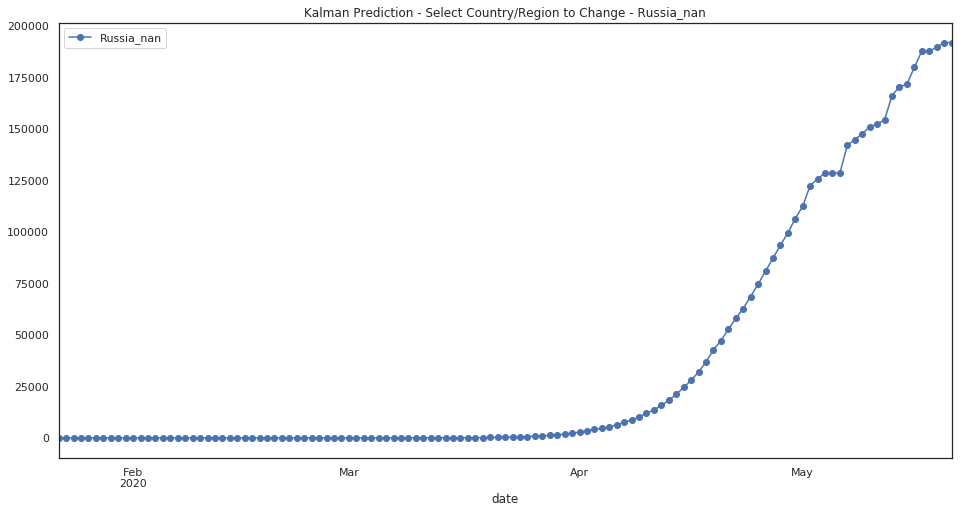

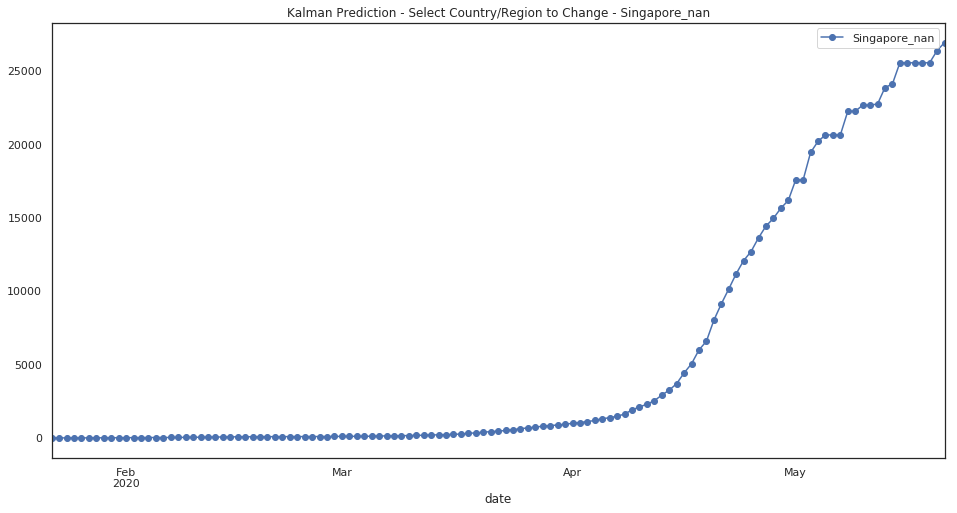

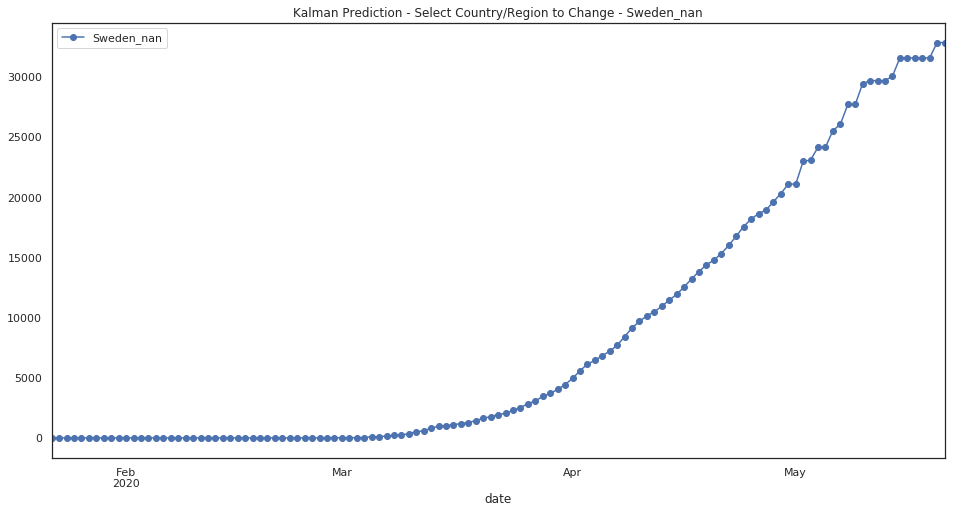

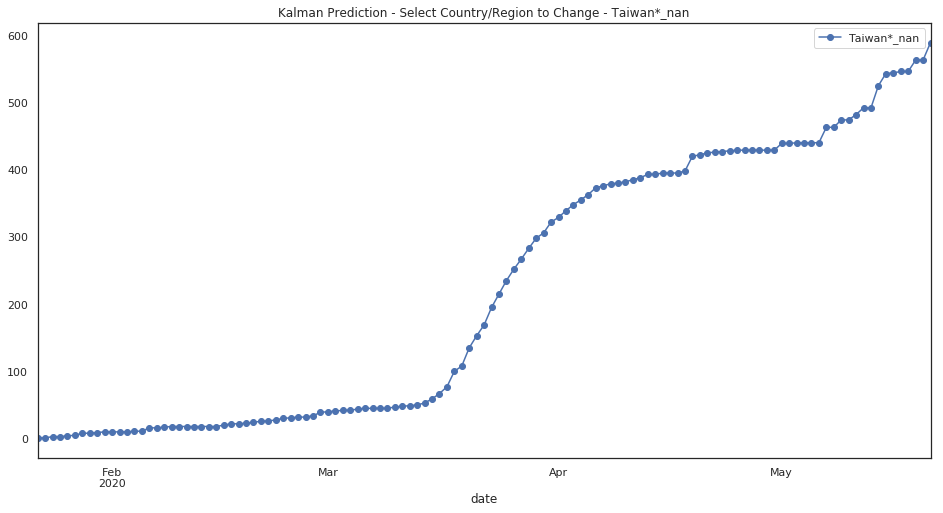

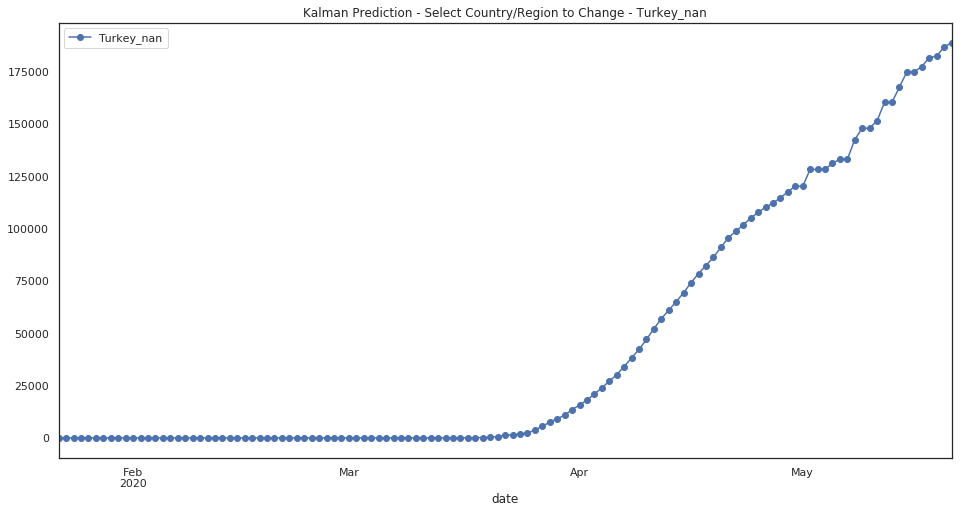

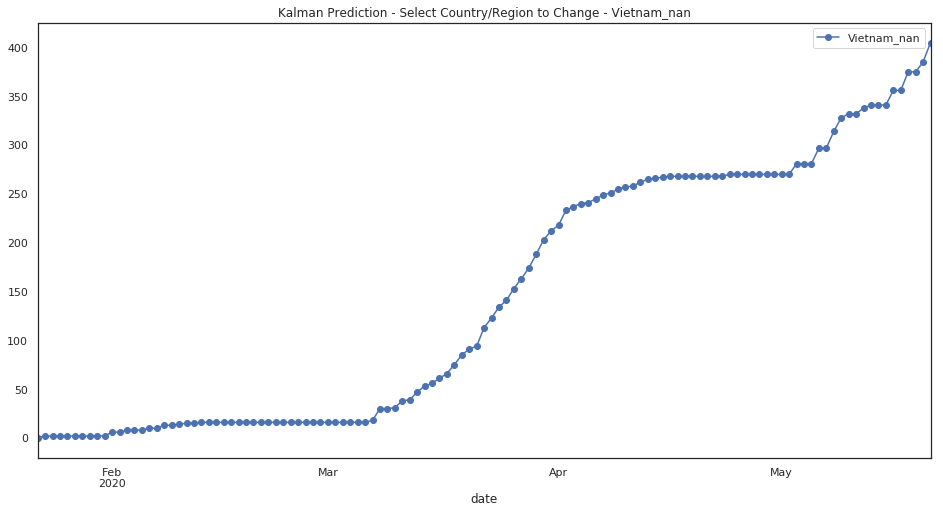

In [60]:
### Joao - Dynamic plot all regions individually
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [61]:
max_p0=all_new[:]
max_p0=max_p0.max()
max_date=max_p0[:1]
max_p0=max_p0[1:]
max_p0=pd.DataFrame(max_p0)
max_p0=max_p0.astype(str)
max_p0['pred_confirmed']=max_p0[max_p0.columns[0]].str.split(' ').str[-1].astype(float)
max_p0[max_p0.columns[0]]=max_p0[max_p0.columns[0]][:-len(max_p0['pred_confirmed'])]
max_p0=max_p0.sort_values(by='pred_confirmed', ascending=False)
#
print("### -- Confirmed max cases per country at last prediction date -- ###")
print(max_date)
max_p0[:]

### -- Confirmed max cases per country at last prediction date -- ###
date    2020-05-21 00:00:00
dtype: object


0  pred_confirmed
United States_nan                             NaN       1717092.0
Spain_nan                                     NaN        260212.0
Italy_nan                                     NaN        244367.0
United Kingdom_nan                            NaN        220382.0
France_nan                                    NaN        206921.0
Russia_nan                                    NaN        191893.0
Turkey_nan                                    NaN        188855.0
Germany_nan                                   NaN        181935.0
Brazil_nan                                    NaN        136080.0
Iran_nan                                      NaN        124369.0
China_Hubei                                   NaN         82523.0
Belgium_nan                                   NaN         61152.0
Peru_nan                                      NaN         55206.0
Netherlands_nan                               NaN         54210.0
India_nan                                     NaN         47607.0
Switzerland_nan                               NaN         41288.0
Mexico_nan                                    NaN         34778.0
Canada_Quebec                                 NaN         34631.0
Sweden_nan                                    NaN         32850.0
Portugal_nan                                  NaN         32654.0
Saudi Arabia_nan                              NaN         32007.0
Belarus_nan                                   NaN         30599.0
Ecuador_nan                                   NaN         29773.0
Canada_Ontario                                NaN         28142.0
Singapore_nan                                 NaN         26921.0
Pakistan_nan                                  NaN         25575.0
Ireland_nan                                   NaN         25310.0
Chile_nan                                     NaN         23353.0
Qatar_nan                                     NaN         21857.0
Israel_nan                                    NaN         21418.0
...                                           ...             ...
Nicaragua_nan                                 NaN            20.0
Belize_nan                                    NaN            19.0
Saint Kitts and Nevis_nan                     NaN            17.0
Holy See_nan                                  NaN            16.0
Yemen_nan                                     NaN            14.0
United Kingdom_Turks and Caicos Islands       NaN            13.0
United Kingdom_Falkland Islands (Malvinas)    NaN            13.0
Gambia_nan                                    NaN            13.0
Canada_Grand Princess                         NaN            13.0
Seychelles_nan                                NaN            11.0
United Kingdom_Montserrat                     NaN            11.0
Canada_Yukon                                  NaN            11.0
Burundi_nan                                   NaN            11.0
Denmark_Greenland                             NaN            11.0
Suriname_nan                                  NaN            10.0
MS Zaandam_nan                                NaN             9.0
Mauritania_nan                                NaN             8.0
Bhutan_nan                                    NaN             8.0
Papua New Guinea_nan                          NaN             8.0
Western Sahara_nan                            NaN             6.0
United Kingdom_British Virgin Islands         NaN             6.0
France_Saint Barthelemy                       NaN             6.0
Canada_Northwest Territories                  NaN             5.0
Netherlands_Bonaire, Sint Eustatius and Saba  NaN             5.0
United Kingdom_Anguilla                       NaN             3.0
China_Tibet                                   NaN             1.0
Comoros_nan                                   NaN             1.0
France_Saint Pierre and Miquelon              NaN             1.0
Canada_Diamond Princess                       NaN             0.0
Canada_Recovered      

In [62]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [63]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [64]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-2,2]*100 -1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-4,2]*100 -1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2]*100 +1)/(t_iter.iloc[i-8,2]*100 -1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(10000000) # Fill 10M population if null
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =((test_iter['last_day']+1)*10000)/((test_iter['population']+1)*100)*100
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [65]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [66]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        
### Joao - Save long term predictions
pred.to_csv('data/pred_'+str(num_days_R_prediction)+'_days.csv', index = False, header=True)
###
pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [67]:
pred[:-1]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-01-22             13.0        166.0         11.0       6227.0   
2020-01-23             13.0        166.0         11.0       6227.0   
2020-01-24             13.0        166.0         11.0       6227.0   
2020-01-25             13.0        166.0         11.0       6227.0   
2020-01-26             13.0        166.0         11.0       6227.0   
2020-01-27             13.0        166.0         11.0       6227.0   
2020-01-28             13.0        166.0         11.0       6227.0   
2020-01-29             13.0        166.0         11.0       6227.0   
2020-01-30             13.0        166.0         11.0       6227.0   
2020-01-31             13.0        166.0         11.0       6227.0   
2020-02-01             13.0        166.0         11.0       6227.0   
2020-02-02             13.0        166.0         11.0       6227.0   
2020-02-03             13.0        166.0         11.0       6227.0   
2020-02-04             13.0        166.0         11.0       6227.0   
2020-02-05             13.0        166.0         11.0       6227.0   
2020-02-06             13.0        166.0         11.0       6227.0   
2020-02-07             13.0        166.0         11.0       6227.0   
2020-02-08             13.0        166.0         11.0       6227.0   
2020-02-09             13.0        166.0         11.0       6227.0   
2020-02-10             13.0        166.0         11.0       6227.0   
2020-02-11             13.0        166.0         11.0       6227.0   
2020-02-12             13.0        166.0         11.0       6227.0   
2020-02-13             13.0        166.0         11.0       6227.0   
2020-02-14             13.0        166.0         11.0       6227.0   
2020-02-15             13.0        166.0         11.0       6227.0   
2020-02-16             13.0        166.0         11.0       6227.0   
2020-02-17             13.0        166.0         11.0       6227.0   
2020-02-18             66.0        166.0         70.0       6227.0   
2020-02-19             39.0        166.0         74.0       6227.0   
2020-02-20             57.0        166.0         74.0       6227.0   
...                     ...          ...          ...          ...   
2020-04-22          15981.0     102556.0      35751.0    4471998.0   
2020-04-23          17187.0     106755.0      37007.0    4509371.0   
2020-04-24          18711.0     111642.0      38208.0    4509365.0   
2020-04-25          19724.0     114147.0      39701.0    4559186.0   
2020-04-26          21415.0     119887.0      41332.0    4602789.0   
2020-04-27          22326.0     122247.0      42922.0    4602782.0   
2020-04-28          24898.0     123921.0      44645.0    4633929.0   
2020-04-29          26744.0     126274.0      46272.0    4633931.0   
2020-04-30          28256.0     128967.0      48843.0    4633927.0   
2020-05-01          31858.0     130139.0      50969.0    4646373.0   
2020-05-02          31871.0     130771.0      51093.0    4746011.0   
2020-05-03          31661.0     139197.0      53712.0    4964022.0   
2020-05-04          35358.0     143054.0      53461.0    5069921.0   
2020-05-05          35243.0     148586.0      57301.0    5069923.0   
2020-05-06          35803.0     157699.0      57291.0    5069932.0   
2020-05-07          39562.0     162379.0      57116.0    5069936.0   
2020-05-08          39295.0     173159.0      58764.0    5069907.0   
2020-05-09          42365.0     182424.0      59242.0    5281700.0   
2020-05-10          45059.0     191647.0      59002.0    5281676.0   
2020-05-11          44942.0     204432.0      61774.0    5350193.0   
2020-05-12          45206.0     218892.0      61670.0    5350201.0   
2020-05-13          49390.0     235081.0      61671.0    5350201.0   
2020-05-14          49291.0     242071.0      61724.0    5350191.0   
2020-05-15          49299.0     265909.0      61568.0    5449861.0   
2020-05-16

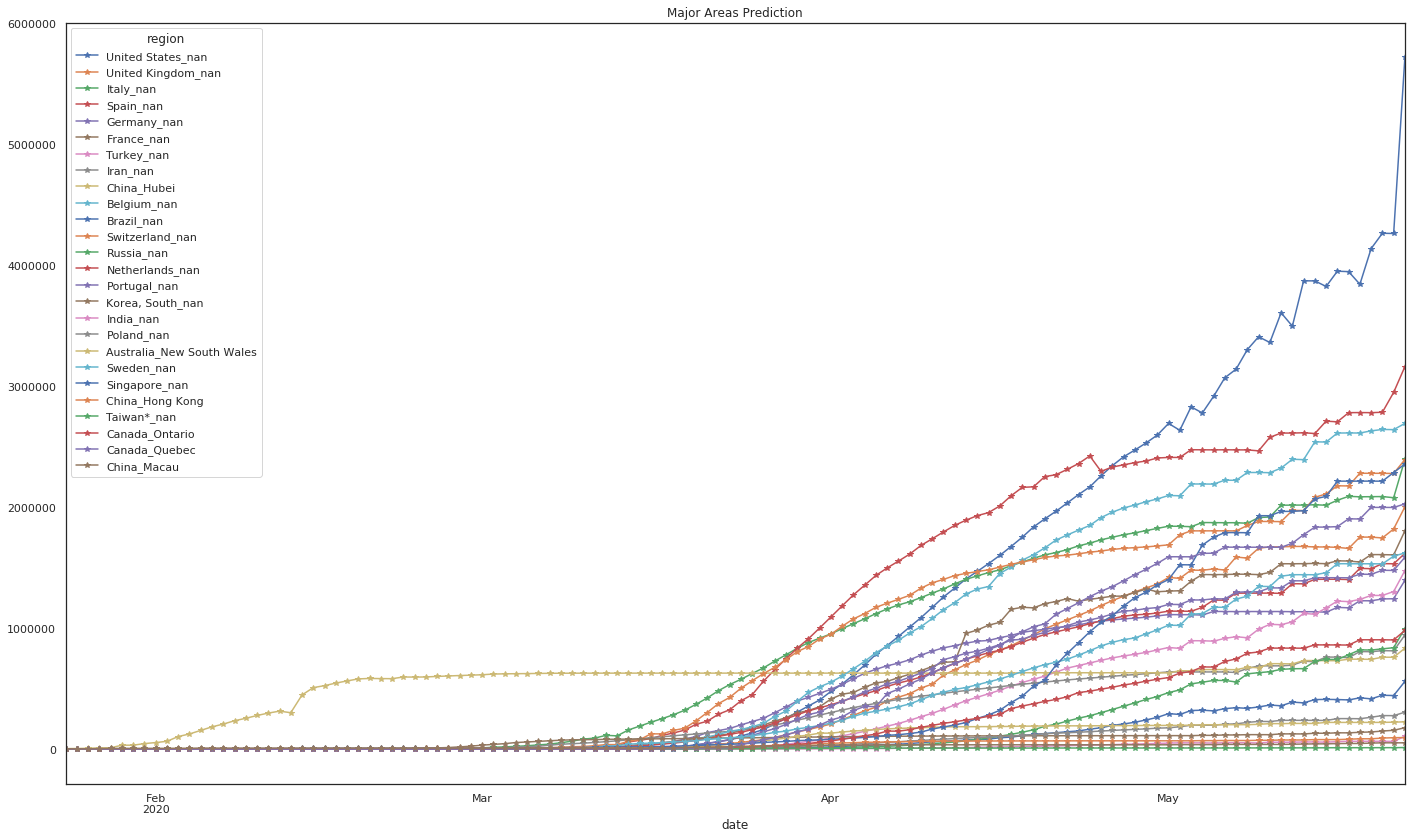

In [68]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'United States_nan',
        'United Kingdom_nan',
        'Italy_nan',
        'Spain_nan',
        'Germany_nan',
        'France_nan',
        'Turkey_nan',
        'Iran_nan',
        'China_Hubei',
        'Belgium_nan',
        'Brazil_nan',
        'Switzerland_nan',
        'Russia_nan',
        'Netherlands_nan',
        'Portugal_nan',
        'Korea, South_nan',
        'India_nan',
        'Poland_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Canada_Ontario',
        'Canada_Quebec',
        'China_Macau'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p[2:].plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

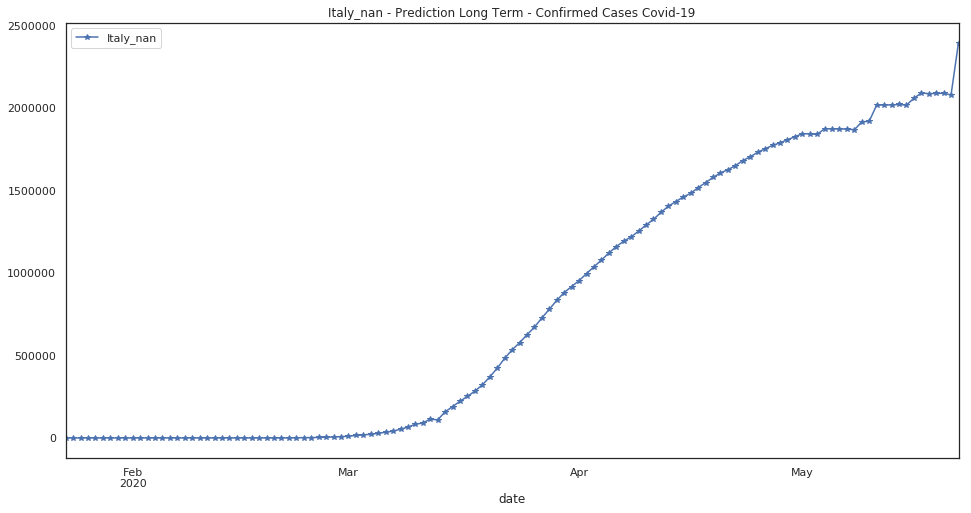

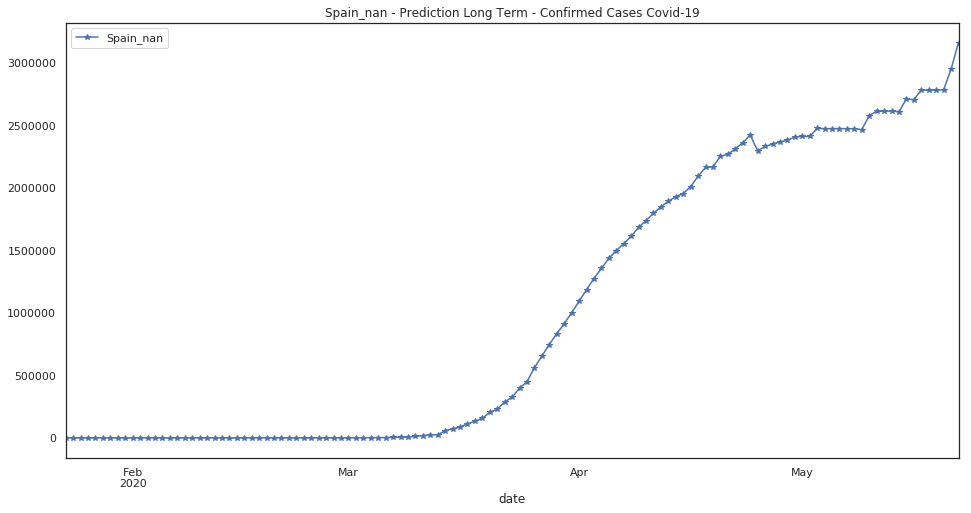

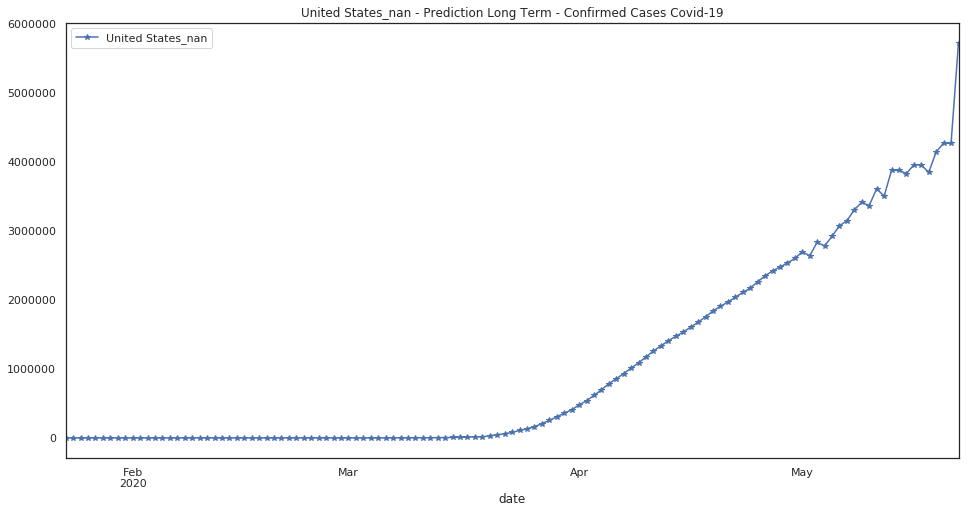

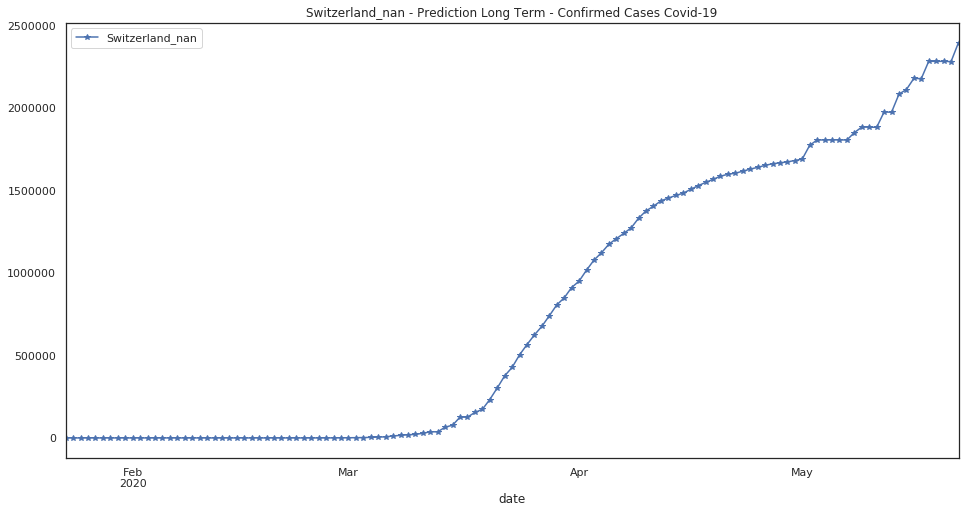

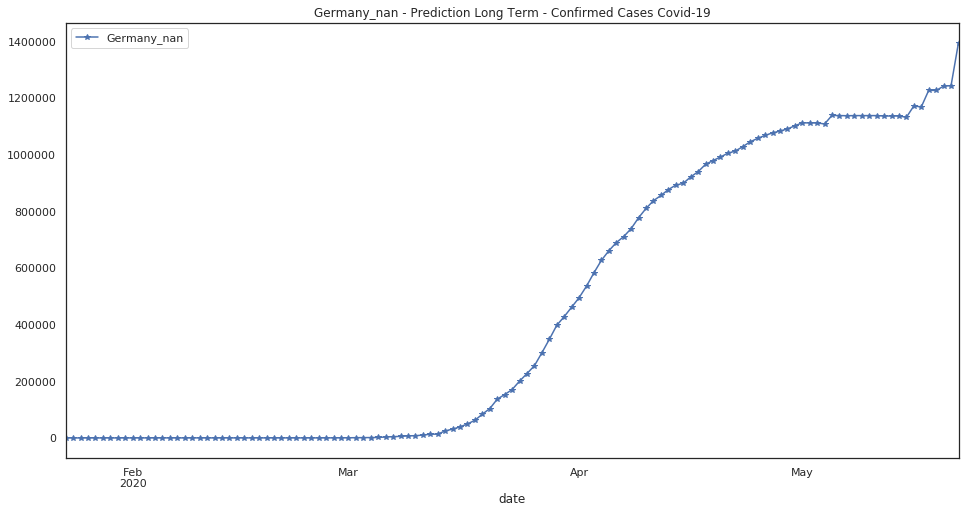

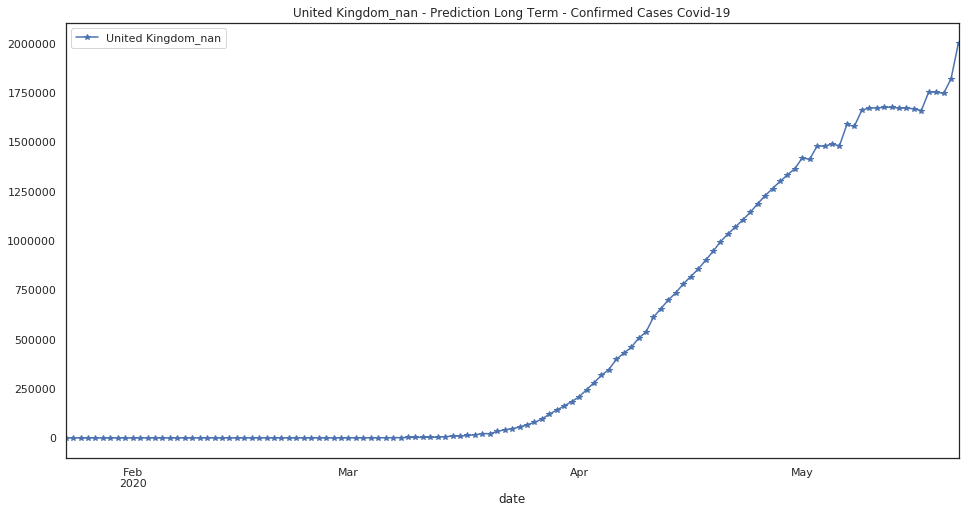

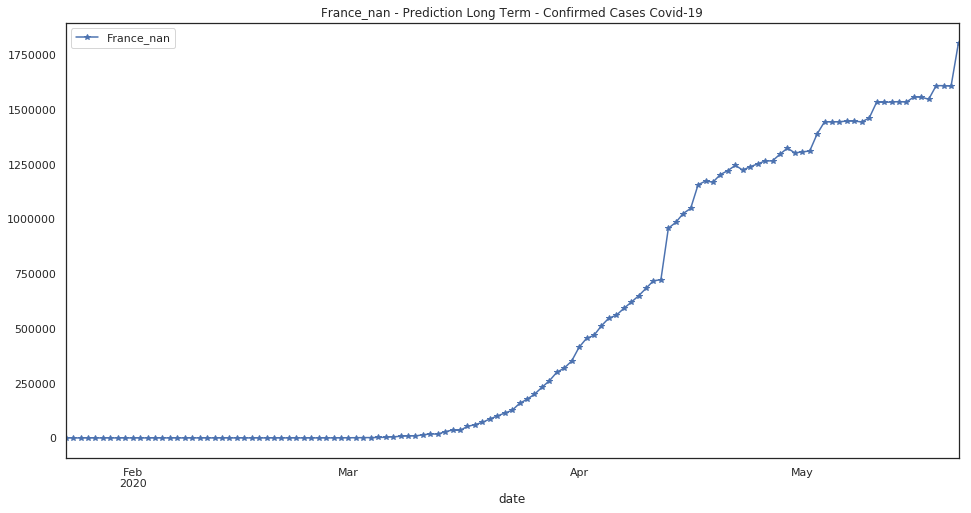

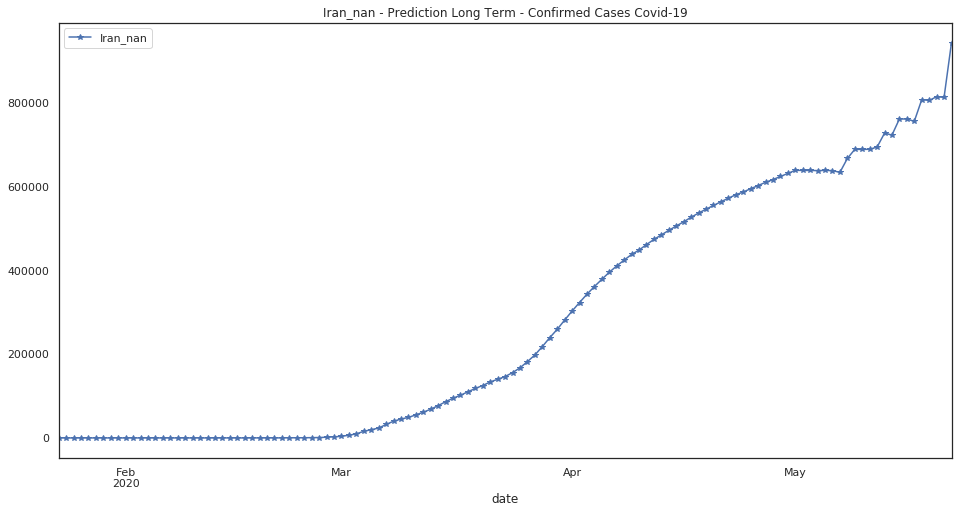

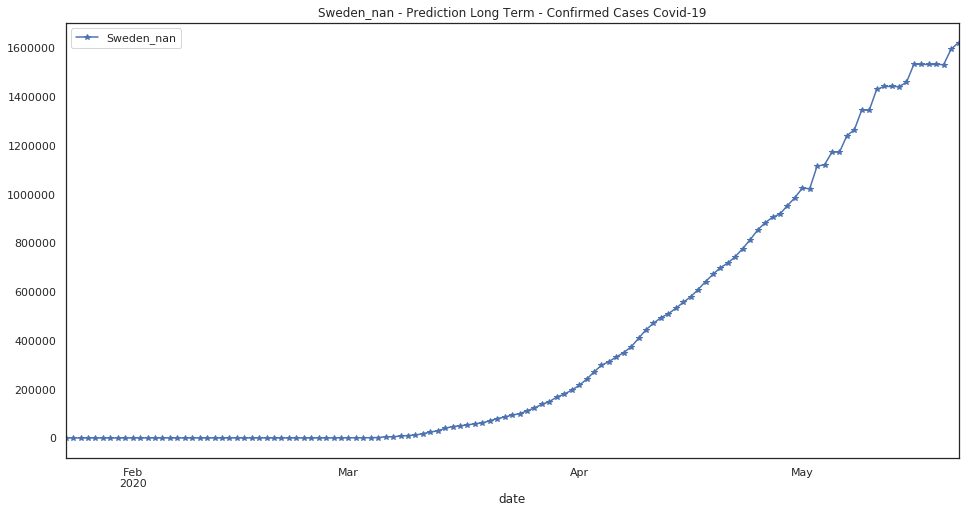

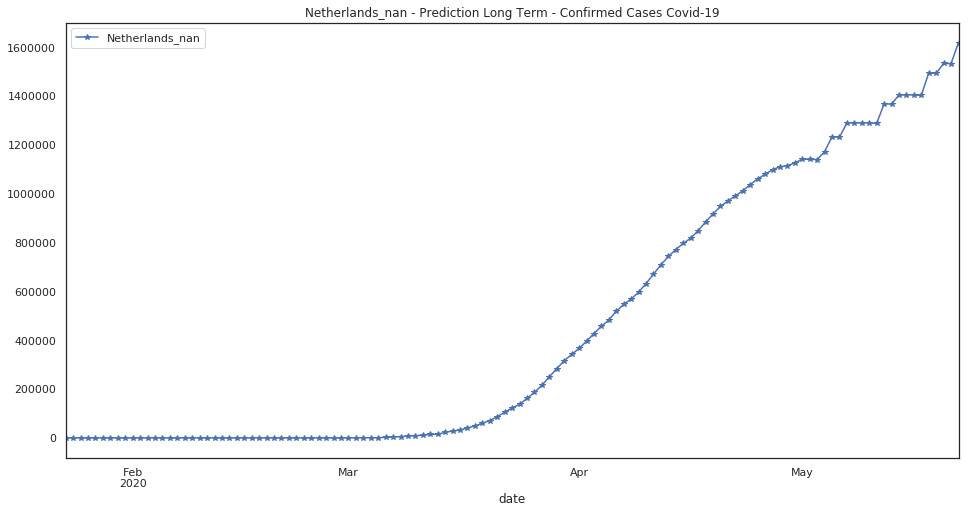

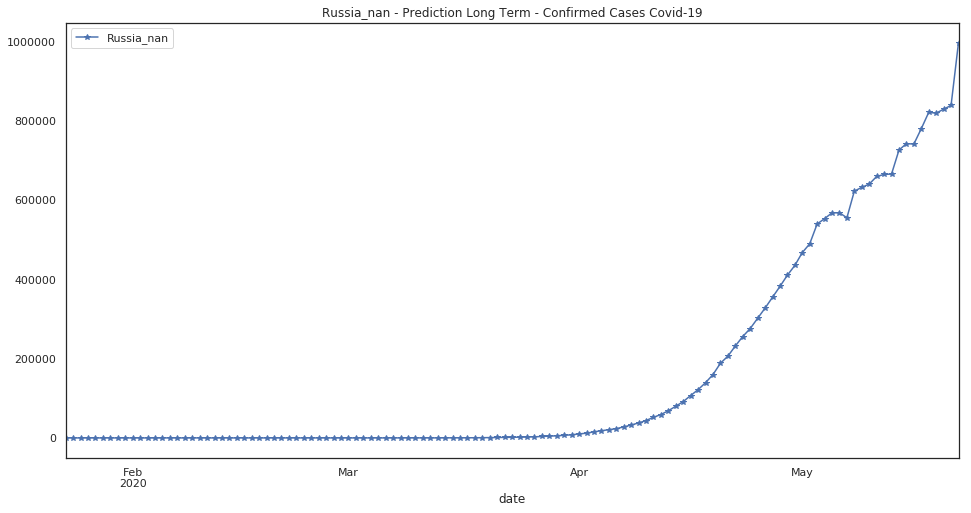

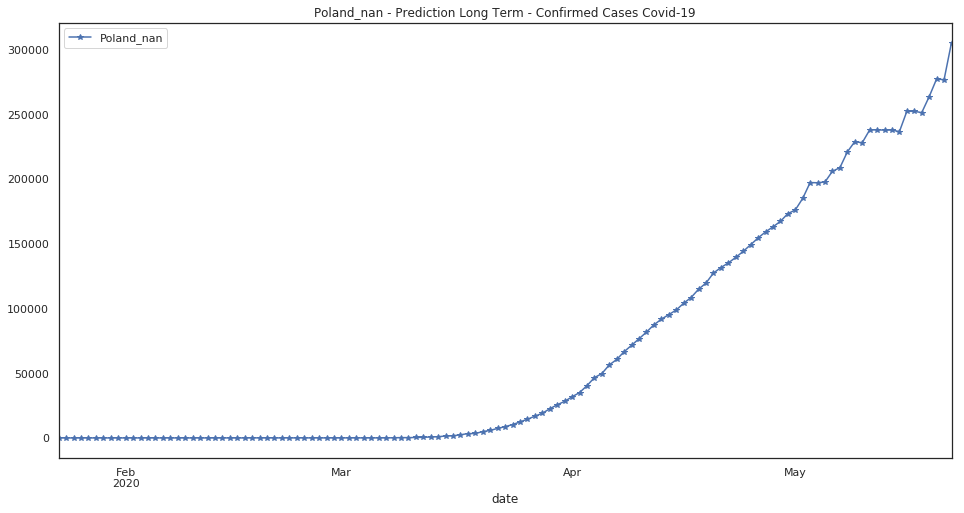

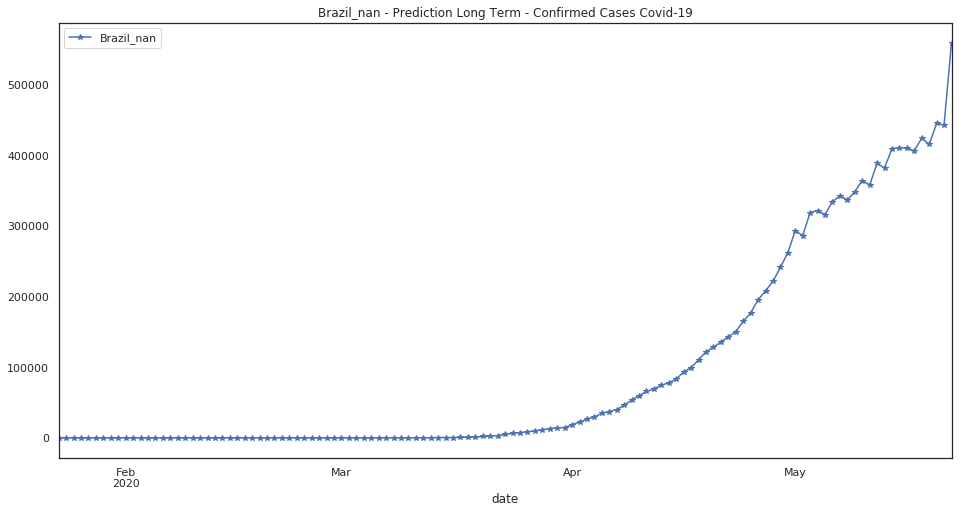

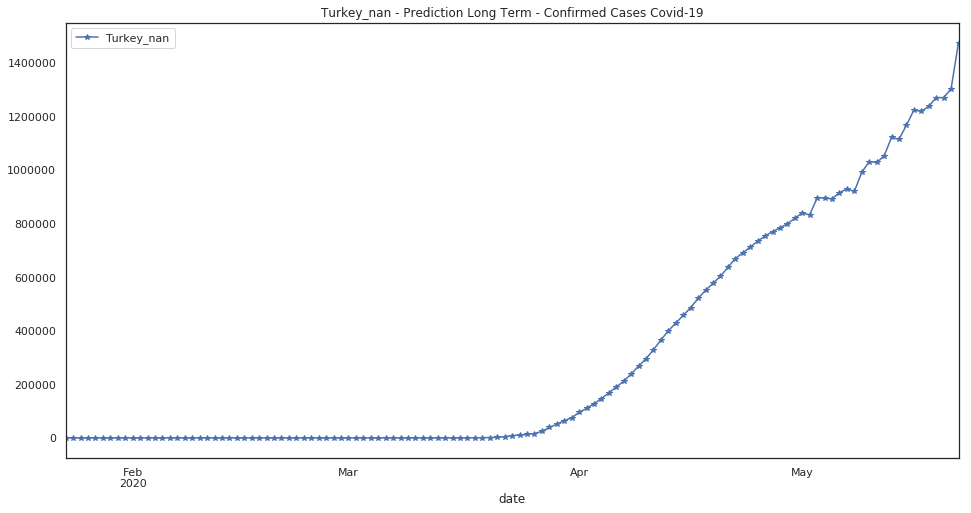

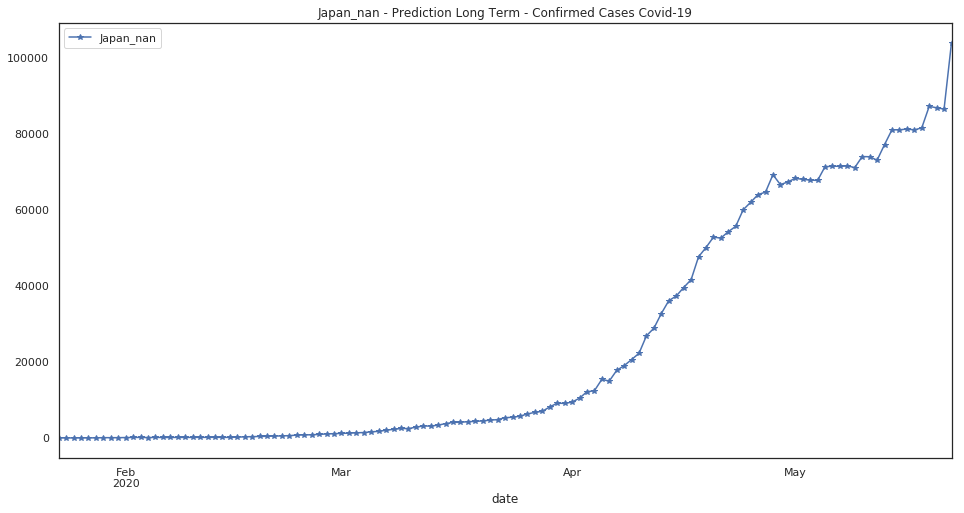

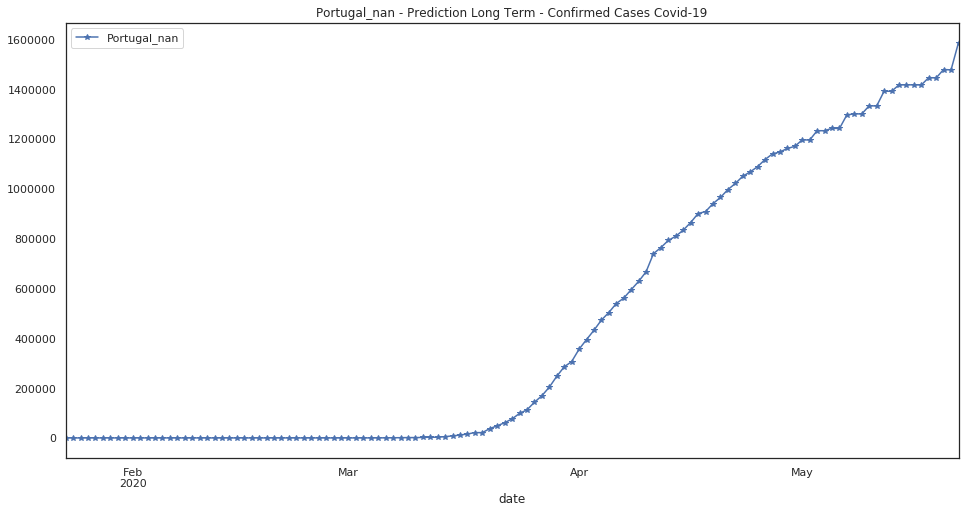

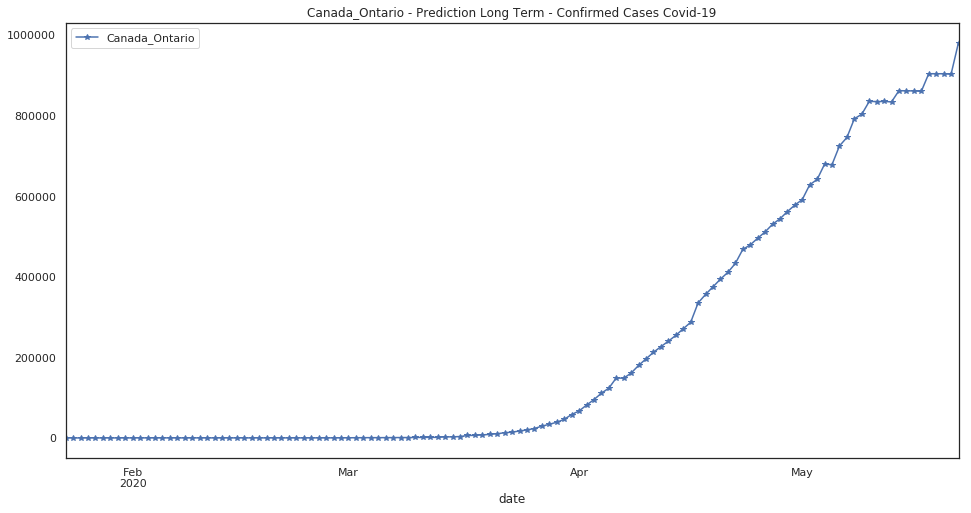

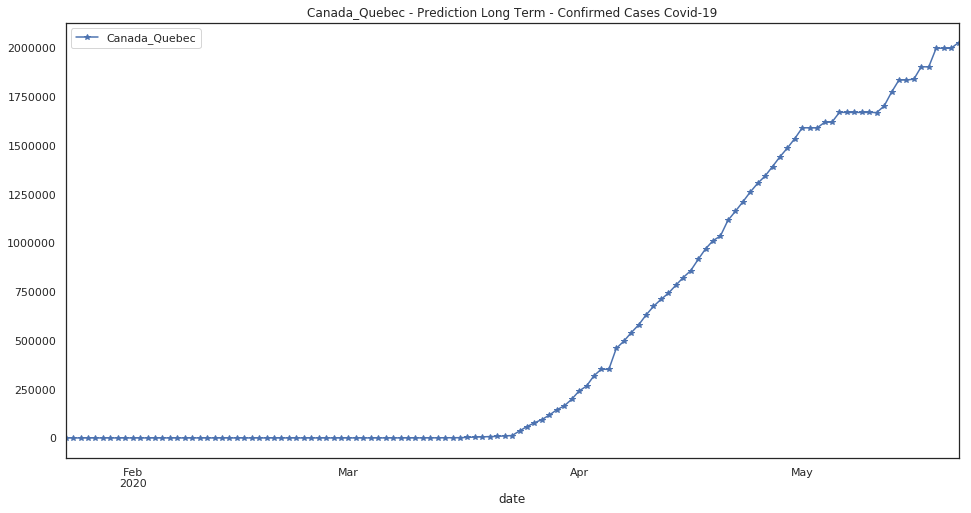

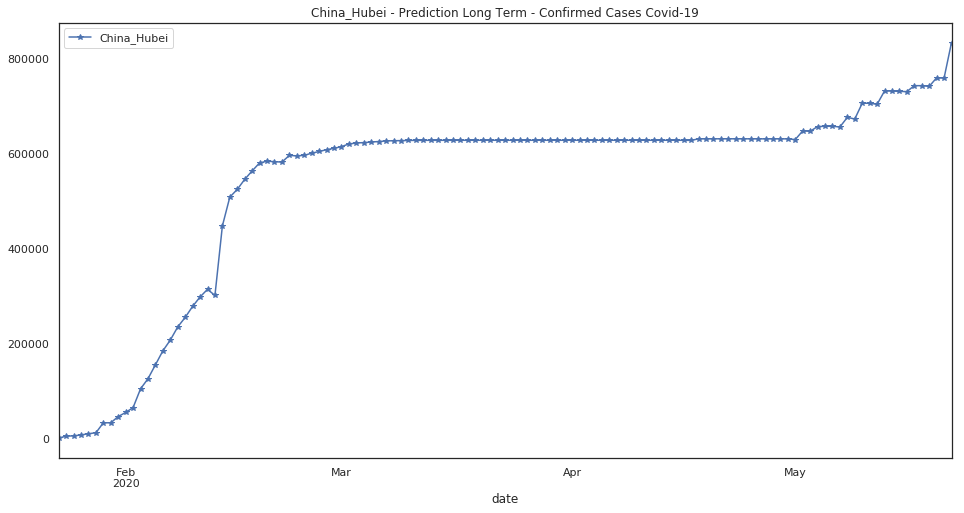

In [69]:
#
rgsx=['Italy_nan','Spain_nan','United States_nan','Switzerland_nan',
      'Germany_nan','United Kingdom_nan','France_nan','Iran_nan',
      'Sweden_nan','Netherlands_nan','Russia_nan','Poland_nan',
      'Brazil_nan','Turkey_nan','Japan_nan',
      'Portugal_nan','Canada_Ontario','Canada_Quebec','China_Hubei']
for i in range (0,len(rgsx)):
        rg_print=rgsx[i]
        pred_prg=pd.DataFrame()
        pred_prg=pred[rg_print]
        pred_prg[1:].plot(marker='*',figsize=(16,8),title =rg_print+' - Prediction Long Term - Confirmed Cases Covid-19')
        plt.legend(loc = 'upper left')
        plt.show()
#

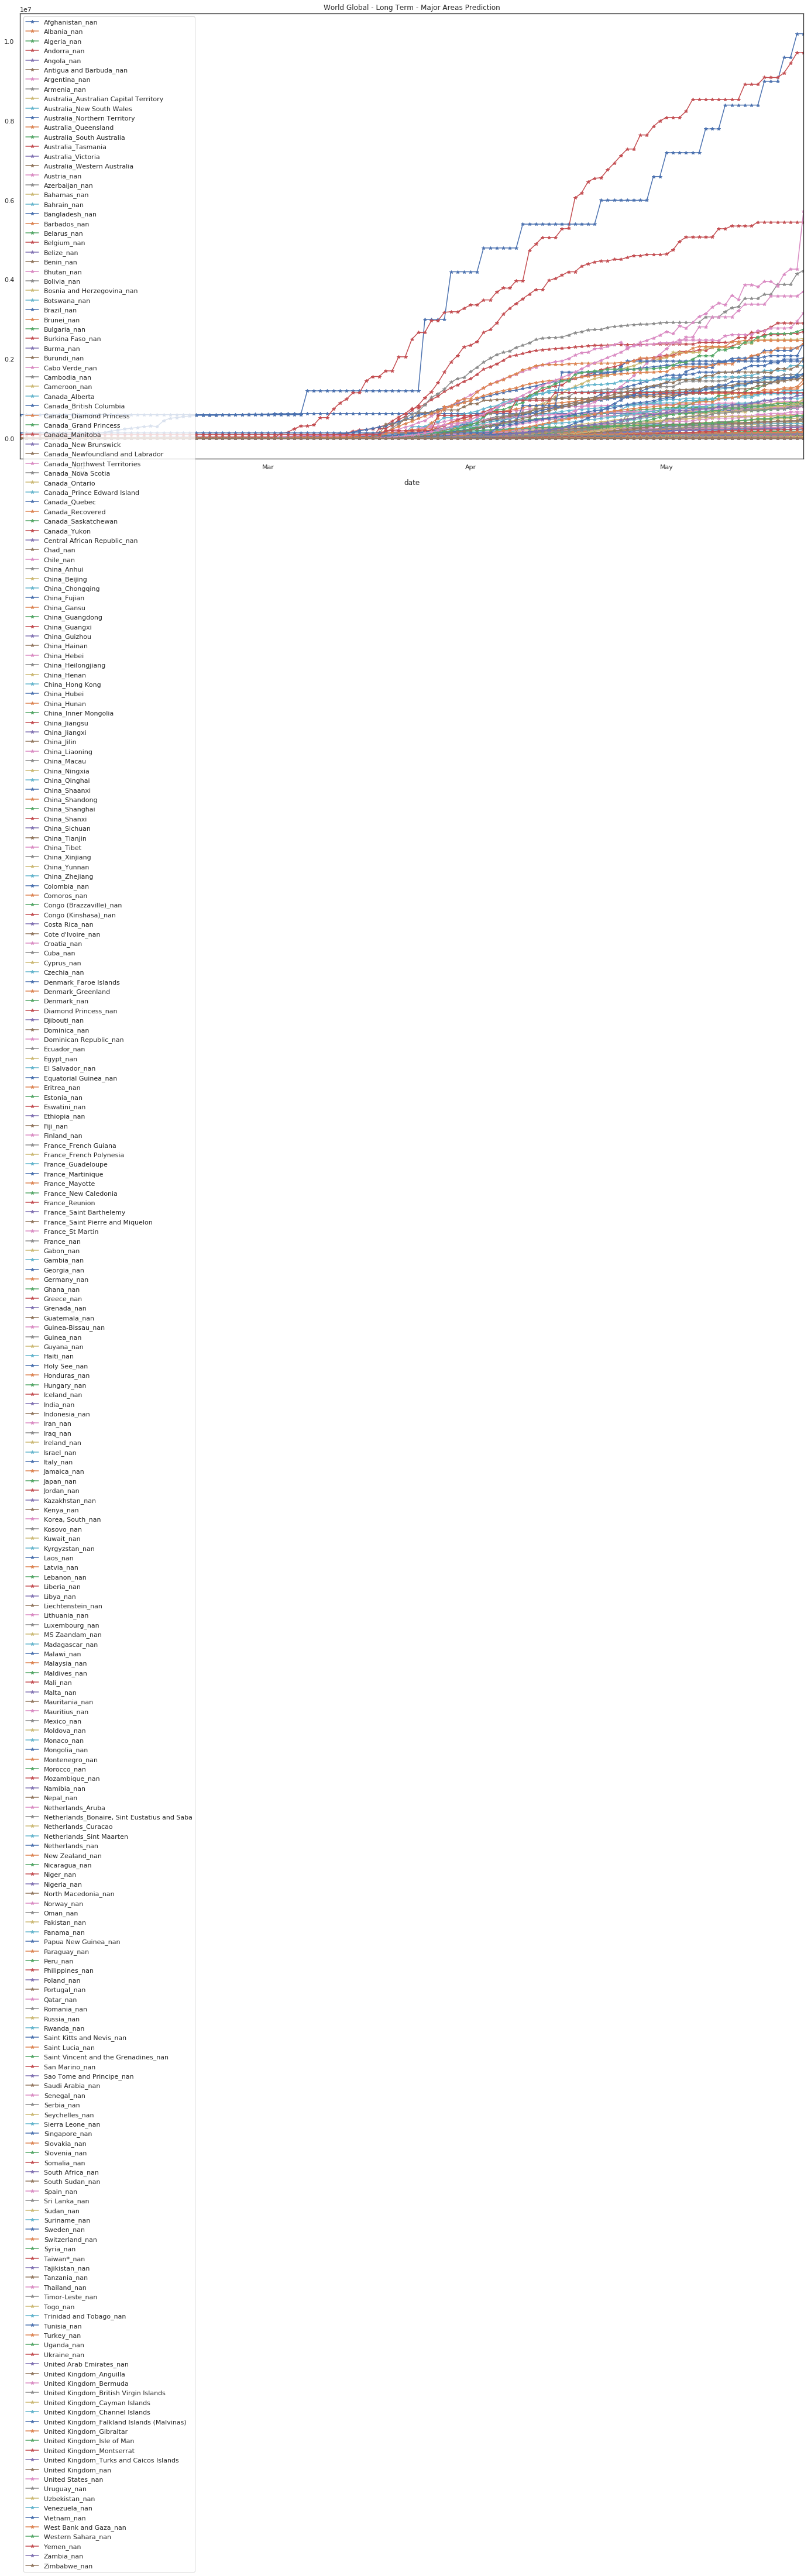

In [70]:
#region=my_train_list
pv2=pred
pv2[1:].plot(marker='*',figsize=(24,14),title ='World Global - Long Term - Major Areas Prediction')
plt.legend(loc = 'upper left')
plt.show()


## Prediction Heatmap

In [71]:
pv1=pv2[1:] #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)

In [72]:
p[45:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-03-08             64.0        166.0        297.0      12455.0   
2020-03-09             87.0        165.0        331.0      12455.0   
2020-03-10            130.0        496.0        327.0      12455.0   
2020-03-11            162.0       1798.0        328.0      12455.0   
2020-03-12            161.0       2164.0        323.0      12455.0   
2020-03-13            170.0       4116.0        376.0      12455.0   
2020-03-14            164.0       5733.0        395.0      12455.0   
2020-03-15            222.0       6577.0        538.0      12455.0   
2020-03-16            297.0       7236.0        686.0      12454.0   
2020-03-17            383.0       8773.0        766.0      18653.0   
2020-03-18            392.0       9429.0        835.0     249341.0   
2020-03-19            386.0      10100.0       1017.0     249512.0   
2020-03-20            383.0      10935.0       1193.0     336596.0   
2020-03-21            415.0      11941.0       1194.0     473430.0   
2020-03-22            400.0      12944.0       1809.0     554406.0   
2020-03-23            648.0      15130.0       2633.0     710145.0   
2020-03-24            622.0      17649.0       3002.0     834671.0   
2020-03-25           1148.0      20843.0       3437.0    1027700.0   
2020-03-26           1296.0      24710.0       3907.0    1177180.0   
2020-03-27           1441.0      29436.0       4760.0    1401400.0   
2020-03-28           1689.0      31457.0       5301.0    1669226.0   
2020-03-29           1684.0      33307.0       5856.0    1924609.0   
2020-03-30           1792.0      35834.0       6563.0    2086540.0   
2020-03-31           2569.0      37674.0       7446.0    2310794.0   
2020-04-01           2567.0      41038.0       9133.0    2348156.0   
2020-04-02           3515.0      43723.0      10799.0    2435332.0   
2020-04-03           4073.0      46736.0      12529.0    2672034.0   
2020-04-04           4177.0      51277.0      14997.0    2740519.0   
2020-04-05           4428.0      56156.0      16039.0    2908671.0   
2020-04-06           5194.0      60876.0      16904.0    3126677.0   
...                     ...          ...          ...          ...   
2020-04-23          17187.0     106755.0      37007.0    4509371.0   
2020-04-24          18711.0     111642.0      38208.0    4509365.0   
2020-04-25          19724.0     114147.0      39701.0    4559186.0   
2020-04-26          21415.0     119887.0      41332.0    4602789.0   
2020-04-27          22326.0     122247.0      42922.0    4602782.0   
2020-04-28          24898.0     123921.0      44645.0    4633929.0   
2020-04-29          26744.0     126274.0      46272.0    4633931.0   
2020-04-30          28256.0     128967.0      48843.0    4633927.0   
2020-05-01          31858.0     130139.0      50969.0    4646373.0   
2020-05-02          31871.0     130771.0      51093.0    4746011.0   
2020-05-03          31661.0     139197.0      53712.0    4964022.0   
2020-05-04          35358.0     143054.0      53461.0    5069921.0   
2020-05-05          35243.0     148586.0      57301.0    5069923.0   
2020-05-06          35803.0     157699.0      57291.0    5069932.0   
2020-05-07          39562.0     162379.0      57116.0    5069936.0   
2020-05-08          39295.0     173159.0      58764.0    5069907.0   
2020-05-09          42365.0     182424.0      59242.0    5281700.0   
2020-05-10          45059.0     191647.0      59002.0    5281676.0   
2020-05-11          44942.0     204432.0      61774.0    5350193.0   
2020-05-12          45206.0     218892.0      61670.0    5350201.0   
2020-05-13          49390.0     235081.0      61671.0    5350201.0   
2020-05-14          49291.0     242071.0      61724.0    5350191.0   
2020-05-15          49299.0     265909.0      61568.0    5449861.0   
2020-05-16          49291.0     265855.0      63368.0    5449848.0   
2020-05-17

In [73]:
p.to_csv('data/p+45_confirmed_daily.csv', index = False, header=True)

In [74]:
#!pip install gmplot
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [75]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
### JOAO - Change Global HeapMap print - USA is too small, as USA States datasets are not used! 
#heatmap=heatmap[heatmap['region'].isin(region)]  ## heatmap for region dataset only 
heatmap=heatmap[heatmap['region'].isin(confirmed['region'])] ## Global heatmap
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')


In [76]:
heatmap_m[:]

region        Lat        Long  \
0                                 Afghanistan_nan  33.000000   65.000000   
1                                     Albania_nan  41.153300   20.168300   
2                                     Algeria_nan  28.033900    1.659600   
3                                     Andorra_nan  42.506300    1.521800   
4                                      Angola_nan -11.202700   17.873900   
5                         Antigua and Barbuda_nan  17.060800  -61.796400   
6                                   Argentina_nan -38.416100  -63.616700   
7                                     Armenia_nan  40.069100   45.038200   
8          Australia_Australian Capital Territory -35.473500  149.012400   
9                       Australia_New South Wales -33.868800  151.209300   
10                   Australia_Northern Territory -12.463400  130.845600   
11                           Australia_Queensland -28.016700  153.400000   
12                      Australia_South Australia -34.928500  138.600700   
13                             Australia_Tasmania -41.454500  145.970700   
14                             Australia_Victoria -37.813600  144.963100   
15                    Australia_Western Australia -31.950500  115.860500   
16                                    Austria_nan  47.516200   14.550100   
17                                 Azerbaijan_nan  40.143100   47.576900   
18                                    Bahamas_nan  25.034300  -77.396300   
19                                    Bahrain_nan  26.027500   50.550000   
20                                 Bangladesh_nan  23.685000   90.356300   
21                                   Barbados_nan  13.193900  -59.543200   
22                                    Belarus_nan  53.709800   27.953400   
23                                    Belgium_nan  50.833300    4.000000   
24                                      Benin_nan   9.307700    2.315800   
25                                     Bhutan_nan  27.514200   90.433600   
26                                    Bolivia_nan -16.290200  -63.588700   
27                     Bosnia and Herzegovina_nan  43.915900   17.679100   
28                                     Brazil_nan -14.235000  -51.925300   
29                                     Brunei_nan   4.535300  114.727700   
..                                            ...        ...         ...   
238                               Timor-Leste_nan  -8.874217  125.727539   
239                                    Belize_nan  13.193900  -59.543200   
240                              Canada_Recovered   0.000000    0.000000   
241                                      Laos_nan  19.856270  102.495496   
242                                     Libya_nan  26.335100   17.228331   
243                        West Bank and Gaza_nan  31.952200   35.233200   
244                             Guinea-Bissau_nan  11.803700  -15.180400   
245                                      Mali_nan  17.570692   -3.996166   
246                     Saint Kitts and Nevis_nan  17.357822  -62.782998   
247                  Canada_Northwest Territories  64.825500 -124.845700   
248                                  Canada_Yukon  64.282300 -135.000000   
249                                    Kosovo_nan  42.602636   20.902977   
250                                     Burma_nan  21.916200   95.956000   
251                       United Kingdom_Anguilla  18.220600  -63.068600   
252         United Kingdom_British Virgin Islands  18.420700  -64.640000   
253       United Kingdom_Turks and Caicos Islands  21.694000  -71.797900   
254                                MS Zaandam_nan   0.000000    0.000000   
255                                  Botswana_nan -22.328500   24.684900   
256                                   Burundi_nan  -3.373100   29.918900   
257                              Sierra Leone_nan   8.460555  -11.779889   
258  Netherlands_Bonaire, Sint Eustatius and Saba  12.178400  -68.238500   
259            

In [77]:
#!pip install folium
import folium 

lat=46.99474
lang=6.87237

p21_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat,lng,num,totpred in zip(heatmap_m.Lat,heatmap_m.Long,range(0,heatmap_m.shape[0]),sum(heatmap_m[heatmap_m.columns[3]] , heatmap_m[heatmap_m.columns[-1]] )):
    popup = folium.Popup( heatmap_m['region'][num]+' pred='+str(totpred)+' date='+date_pred , parse_html=True)
    use_color=heatmap_m['region'][num][0]
    #print('use_color=',use_color)
    folium.Marker(
                    [lat,lng],
                    popup=popup,
                    icon=folium.Icon(color=colors[use_color])
            ).add_to(p21_cluster)
p21_cluster

In [78]:
#
region_m2=region + ['Andorra_nan','Monaco_nan','San Marino_nan','Ireland_nan','Slovenia_nan','Slovakia_nan',
                    'Hungary_nan','Ukraine_nan','Croatia_nan','Finland_nan','Norway_nan','Estonia_nan','Denmark_nan',
                    'Chile_nan','Argentina_nan','Mexico_nan','Ecuador_nan','Colombia_nan','Costa Rica_nan',
                    'South Africa_nan','Morocco_nan','Algeria_nan','Saudi Arabia_nan','Israel_nan','Japan_nan',
                    'Singapore_nan']
heatmap_m2=heatmap_m[heatmap_m['region'].isin(region_m2)].reset_index()
#
heatmap_m2[:]

index                     region      Lat      Long  2020-01-23 00:00:00  \
0       2                Algeria_nan  28.0339    1.6596                 11.0   
1       3                Andorra_nan  42.5063    1.5218               6227.0   
2       6              Argentina_nan -38.4161  -63.6167                 10.0   
3       9  Australia_New South Wales -33.8688  151.2093                154.0   
4      23                Belgium_nan  50.8333    4.0000                 50.0   
5      28                 Brazil_nan -14.2350  -51.9253                  2.0   
6      42             Canada_Ontario  51.2538  -85.3232                 48.0   
7      44              Canada_Quebec  52.9399  -73.5491                 56.0   
8      48                  Chile_nan -35.6751  -71.5430                 25.0   
9      61            China_Hong Kong  22.3000  114.2000                104.0   
10     62                China_Hubei  30.9756  112.2707                444.0   
11     69                China_Macau  22.1667  113.5500                815.0   
12     82               Colombia_nan   4.5709  -74.2973                  9.0   
13     85             Costa Rica_nan   9.7489  -83.7534                 94.0   
14     87                Croatia_nan  45.1000   15.2000                117.0   
15     94                Denmark_nan  56.2639    9.5018                 82.0   
16     97                Ecuador_nan  -1.8312  -78.1834                 27.0   
17    102                Estonia_nan  58.5953   25.0136                362.0   
18    106                Finland_nan  64.0000   26.0000                 93.0   
19    116                 France_nan  46.2276    2.2137                 34.0   
20    121                Germany_nan  51.0000    9.0000                 18.0   
21    130                Hungary_nan  47.1625   19.5033                 49.0   
22    132                  India_nan  21.0000   78.0000                 57.0   
23    134                   Iran_nan  32.0000   53.0000                  5.0   
24    136                Ireland_nan  53.1424   -7.6921                 97.0   
25    137                 Israel_nan  31.0000   35.0000                 55.0   
26    138                  Italy_nan  43.0000   12.0000                 51.0   
27    140                  Japan_nan  36.0000  138.0000                 22.0   
28    144           Korea, South_nan  36.0000  128.0000                 40.0   
29    160                 Mexico_nan  23.6345 -102.5528                  3.0   
30    162                 Monaco_nan  43.7333    7.4167              12275.0   
31    165                Morocco_nan  31.7917   -7.0926                 12.0   
32    171            Netherlands_nan  52.1326    5.2913                 27.0   
33    177                 Norway_nan  60.4720    8.4689                 89.0   
34    185                 Poland_nan  51.9194   19.1451                 12.0   
35    186               Portugal_nan  39.3999   -8.2245                 72.0   
36    189                 Russia_nan  60.0000   90.0000                  0.0   
37    193             San Marino_nan  43.9424   12.4578              14181.0   
38    194           Saudi Arabia_nan  24.0000   45.0000                 13.0   
39    198              Singapore_nan   1.2833  103.8333                142.0   
40    199               Slovakia_nan  48.6690   19.6990                 87.0   
41    200               Slovenia_nan  46.1512   14.9955                231.0   
42    202           South Africa_nan -30.5595   22.9375                  7.0   
43    203                  Spain_nan  40.0000   -4.0000                 36.0   
44    207                 Sweden_nan  63.0000   16.0000                 70.0   
45    208            Switzerland_nan  46.8182    8.2275                 55.0   
46    209                Taiwan*_nan  23.7000  121.0000                 19.0   
47    215                 Turkey_nan  38.9637   35.2433                  5.0   
48    217                Ukraine_nan  48.3794   31.1656                 10.0   
49  

In [79]:
import folium 

lat=46.99474
lang=6.87237

p21_reg_cluster=folium.Map(location=[lat,lang],zoom_start=6)
from folium import plugins
cluster=plugins.MarkerCluster().add_to(p21_reg_cluster)

colors={'A':'darkgreen','B':'darkpurple','C':'pink','D':'beige','E':'red','F':'lightblue','G':'darkblue','H':'cadetblue','I':'gray',
        'J':'lightred','K':'blue','L':'orange','M':'lightgreen','N':'orange','O':'purple','P':'lightgray','Q':'darkred','R':'green',
        'S':'black','T':'blue','U':'purple','V':'green','X':'blue','Y':'beige','W':'pink','Z':'white'}

date_pred=(datetime.today()+pd.DateOffset(days=num_days_R_prediction)).strftime('%Y-%m-%d')

for lat2,lng2,num2,totpred2 in zip(heatmap_m2.Lat,heatmap_m2.Long,range(0,heatmap_m2.shape[0]),sum(heatmap_m2[heatmap_m2.columns[3]] , heatmap_m2[heatmap_m2.columns[-1]] )):
    use_color2=heatmap_m2['region'][num2][0]
    popup2 = folium.Popup( heatmap_m2['region'][num2]+' pred='+str(totpred2)+' date='+date_pred , parse_html=True)  
    #print('use_color=',use_color)
    folium.Marker(
                    [lat2,lng2],
                    popup=popup2,
                    icon=folium.Icon(color=colors[use_color2])
            ).add_to(p21_reg_cluster)
p21_reg_cluster

In [80]:
#
datemap=datetime.today().strftime('%Y-%m-%d')
p21_cluster.save("heatmaps/Heatmap_Folium-Global-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")
#
p21_reg_cluster.save("heatmaps/Heatmap_Folium-Regional-"+datemap+"-pred"+str(num_days_R_prediction)+"Days.html")

In [81]:
print("Stats and Forecast Done for Today!")
print("I'm done with this past month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this past month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [82]:
exit()